# Predictive Modeling for Term Deposit Subscription in Bank Marketing

Author : Theofilus Arifin

---



# Introduction

**Table of Content**:

- Introduction
- Load Dataset
- Data Cleaning
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Evaluation
- Business Recomendation

**Background**

Perusahaan X, sebuah lembaga keuangan, berencana untuk mengoptimalkan kampanye pemasaran deposito berjangka mereka. Kampanye ini merupakan bagian penting dari strategi pemasaran mereka untuk menjangkau pelanggan yang sudah ada dan potensial. Namun, sumber daya dan investasi yang diperlukan untuk kampanye ini cukup signifikan. Oleh karena itu, keberhasilannya sangat bergantung pada kemampuan untuk menargetkan audiens yang paling mungkin berlangganan deposito berjangka.

**Apa itu Deposito Berjangka?**

Deposito berjangka adalah deposito di lembaga keuangan dengan tanggal jatuh tempo atau periode jatuh tempo tertentu, umumnya disebut sebagai "jangka waktu". Deposito berjangka berbeda dari deposito panggilan, seperti tabungan atau rekening cek, yang dapat ditarik kapan saja, tanpa pemberitahuan atau denda. Deposito yang memerlukan pemberitahuan penarikan secara efektif merupakan deposito berjangka, meskipun mereka tidak memiliki tanggal jatuh tempo yang tetap.

Deposito berjangka adalah investasi dengan jangka waktu tertentu yang melibatkan penyetoran uang ke dalam rekening di lembaga keuangan. Investasi deposito berjangka biasanya memiliki jatuh tempo pendek mulai dari satu bulan hingga beberapa tahun dan akan memiliki tingkat minimum deposit yang berbeda-beda.

Investor harus memahami bahwa ketika membeli deposito berjangka, mereka hanya dapat menarik dana mereka setelah jangka waktu berakhir. Dalam beberapa kasus, pemegang rekening dapat mengizinkan investor untuk mengakhiri atau menarik dana mereka secara dini jika memberikan pemberitahuan beberapa hari sebelumnya. Selain itu, akan ada denda yang dikenakan untuk pengakhiran dini.

**Key Takeways**

- Deposito berjangka adalah jenis akun deposito yang dipegang di lembaga keuangan, di mana dana disimpan untuk jangka waktu tertentu.
- Deposito berjangka umumnya memiliki jangka waktu pendek, mulai dari satu bulan hingga beberapa tahun.
- Biasanya, deposito berjangka menawarkan tingkat bunga yang lebih tinggi daripada rekening tabungan likuid tradisional, di mana nasabah dapat menarik dana kapan saja.

**Goals**

Optimalisasi alokasi sumber daya pemasaran dengan membuat model untuk mengidentifikasi pelanggan yang berpotensi berlangganan deposito berjangka untuk mengarahkan upaya pemasaran dengan lebih efektif.

**Business Metric**

Tingkat Konversi Langganan (*Subscription Conversion Rate*): Persentase individu yang dihubungi yang berlangganan deposito berjangka.

Metric ini mengukur efektivitas model prediktif dalam mengidentifikasi calon pelanggan dan mengoptimalkan penargetan kampanye. Dengan meningkatkan tingkat konversi langganan, bank dapat mencapai keberhasilan yang lebih besar dalam mendapatkan pelanggan baru.

# Library and Load Dataset

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import math
import scipy.stats as ss
from scipy.stats import pointbiserialr

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
!pip install catboost
!pip install bayesian-optimization
!pip install shap

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
import joblib

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Evaluation
from bayes_opt import BayesianOptimization
import shap

In [ ]:
!git clone https://github.com/Theofilusarifin/Predictive-Modeling-for-Term-Deposit-Subscription-in-Bank-Marketing.git

Cloning into 'Predictive-Modeling-for-Term-Deposit-Subscription-in-Bank-Marketing'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 2 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 513.04 KiB | 10.92 MiB/s, done.
Resolving deltas: 100% (1/1), done.


## Read Dataset

---



In [ ]:
df = pd.read_csv('/content/Predictive-Modeling-for-Term-Deposit-Subscription-in-Bank-Marketing/dataset/dataset.csv')
df.shape

(31647, 18)

In [ ]:
df.sample(5)

ID  age          job  marital  education default  balance housing loan    contact  day  \
9682   24730   40  blue-collar  married  secondary      no      755      no   no   cellular   17   
2536   13819   38  blue-collar   single    primary      no     1351      no   no   cellular   10   
20394  39750   35   technician   single   tertiary      no     2288      no   no  telephone   28   
28041   2506   52   technician  married  secondary      no       11     yes   no    unknown   13   
18030  15688   32   management  married   tertiary      no       71     yes   no   cellular   21   

      month  duration  campaign  pdays  previous poutcome subscribed  
9682    nov       408         1    117         1  failure         no  
2536    jul        96         1     -1         0  unknown         no  
20394   may        32         2     -1         0  unknown         no  
28041   may       420         1     -1         0  unknown         no  
18030   jul       221         8     -1         0  unknown         no

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


## Dataset Overview


---



### Feature Segmentation

#### Client Data

| **Feature** | **Description**                                                                                        |
|------------|--------------------------------------------------------------------------------------------------------|
| `ID`       | ID of client                                                                                           |
| `age`      | Age of client                                                                                          |
| `job`      | Type of job                                                                                            |
| `marital`  | Marital status                                                                                         |
| `education`| Education level                                                                                        |
| `default`  | Has credit in default?                                                                                |
| `balance`  | Balance in account                                                                                     |
| `housing`  | Has housing loan?                                                                                      |
| `loan`     | Has personal loan?                                                                                     |

#### Latest Campaign Interaction Data

| **Feature** | **Description**                                                                                        |
|------------|--------------------------------------------------------------------------------------------------------|
| `contact`  | Contact communication type                                                                             |
| `day`      | Date digit of last contact                                                                             |
| `month`    | Last contact month of year                                                                             |
| `duration` | Last contact duration, in seconds

#### Historical Campaign Interaction Data

| **Feature** | **Description**                                                                                        |
|------------|--------------------------------------------------------------------------------------------------------|
| `campaign` | Number of contacts performed during this campaign and for this client                                   |
| `pdays`    | Number of days since the client was last contacted from a previous campaign                              |
| `previous` | Number of contacts performed before this campaign and for this client                                   |
| `poutcome` | Outcome of the previous marketing campaign                                                             |

#### Output Target

| **Feature** | **Description**                                                                                        |
|------------|--------------------------------------------------------------------------------------------------------|
| `subscribed`| Has the client subscribed a term deposit?                                                              |


### Overview

In [ ]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index

print("Jumlah fitur numerik:", len(numerical_feats))
print("Jumlah fitur kategorikal:", len(categorical_feats))

Jumlah fitur numerik: 8
Jumlah fitur kategorikal: 10


In [ ]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

feature  data_type   null_values   null_percentage   unique_values  \
0           ID      int64             0             0.000           31647   
1          age      int64             0             0.000              76   
2          job     object             0             0.000              12   
3      marital     object             0             0.000               3   
4    education     object             0             0.000               4   
5      default     object             0             0.000               2   
6      balance      int64             0             0.000            6326   
7      housing     object             0             0.000               2   
8         loan     object             0             0.000               2   
9      contact     object             0             0.000               3   
10         day      int64             0             0.000              31   
11       month     object             0             0.000              12   
12    duration      int64             0             0.000            1454   
13    campaign      int64             0             0.000              45   
14       pdays      int64             0             0.000             509   
15    previous      int64             0             0.000              38   
16    poutcome     object             0             0.000               4   
17  subscribed     object             0             0.000               2   

                                        unique_sample  
0                 [26110, 40576, 15320, 43962, 29842]  
1                                [56, 31, 27, 57, 33]  
2   [admin., unknown, services, management, techni...  
3                         [married, divorced, single]  
4             [unknown, secondary, tertiary, primary]  
5                                           [no, yes]  
6                           [1933, 3, 891, 3287, 119]  
7                                           [no, yes]  
8                                           [no, yes]  
9                      [telephone, cellular, unknown]  
10                                [19, 20, 18, 22, 4]  
11                          [nov, jul, jun, feb, sep]  
12                            [44, 91, 240, 867, 380]  
13                                    [2, 1, 3, 4, 7]  
14                              [-1, 84, 251, 9, 456]  
15                                    [0, 3, 2, 4, 1]  
16                 [unknown, success, failure, other]  
17                                          [no, yes]

In [ ]:
for feature in categorical_feats:
    print("{} have {} unique values".format(feature, df[feature].nunique()))
    print("{} values: {}".format(feature, df[feature].unique()))
    print('-' * 100)

job have 12 unique values
job values: ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
----------------------------------------------------------------------------------------------------
marital have 3 unique values
marital values: ['married' 'divorced' 'single']
----------------------------------------------------------------------------------------------------
education have 4 unique values
education values: ['unknown' 'secondary' 'tertiary' 'primary']
----------------------------------------------------------------------------------------------------
default have 2 unique values
default values: ['no' 'yes']
----------------------------------------------------------------------------------------------------
housing have 2 unique values
housing values: ['no' 'yes']
----------------------------------------------------------------------------------------------------
loan have 2 unique v

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df['ID'].duplicated().sum()

0

**Key Takeaways** :

- Dataset memeiliki 31647 records dan 18 fitur
- 8 fitur bertipe numerik dan 10 fitur bertipe kategorikal
- Tipe data pada feature yang ada berupa: object dan int64
- Tidak ada fitur yang memiliki missing value
- Tidak ada data duplikat

# Data Cleaning

Menghapus kolom `ID` dari DataFrame. Ini dilakukan karena kolom `ID` tidak diperlukan dalam analisis atau pemodelan selanjutnya, karena hanya merupakan identifikasi unik untuk setiap entri dan tidak memberikan informasi yang relevan untuk tujuan analisis.

In [ ]:
df = df.drop(columns=['ID'], axis=1)
numerical_feats = numerical_feats.drop('ID')

# Exploratory Data Analysis

In [ ]:
df_eda = df.copy()

## Univariate Analysis

Analisis statistik yang memeriksa satu variabel tunggal dalam sebuah dataset untuk memahami karakteristik dasarnya, seperti distribusi dan tendensi sentral

### Function

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

def num_plot(df, col, figsize=(8, 5)):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=figsize,gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(col + ' Distribution', fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0],color = "#1D8EF5")
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1],color = "#33AAFF", edgecolor="#1D1EA2")
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linestyle='--',linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
    plt.axvline(df[col].median(), color='red', linestyle='--',linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
    plt.axvline(df[col].mode()[0], color='purple', linestyle='--',linewidth=2.2, label='mode='+ str(np.round(df[col].mode()[0],1)))

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    plt.axvline(q1, color='orange', linestyle='--',linewidth=2.2, label='Q1=' + str(np.round(q1,1)))
    plt.axvline(q3, color='blue', linestyle='--',linewidth=2.2, label='Q3='+ str(np.round(q3,1)))

    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [ ]:
def top_freq_percentage(dataset, feats):
  top_freq_percentages = {}
  top_categories = {}

  for feature in feats:
      value_counts = dataset[feature].value_counts()
      top_category = value_counts.idxmax()

      top_freq_percentage = (value_counts[top_category] / len(dataset)) * 100
      top_freq_percentages[feature] = top_freq_percentage
      top_categories[feature] = top_category

  top_freq_percentages_df = pd.DataFrame.from_dict(top_freq_percentages, orient='index', columns=['top_frequency_percentage']).sort_values('top_frequency_percentage', ascending=False)
  top_categories_df = pd.DataFrame.from_dict(top_categories, orient='index', columns=['top_category'])

  result_df = pd.concat([top_freq_percentages_df, top_categories_df], axis=1)
  return result_df

In [ ]:
def calculate_outliers(column):
  # Calculate the IQR
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1

  # Define lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter the column to count outliers
  outliers = column[(column < lower_bound) | (column > upper_bound)]

  # Calculate percentage of outliers
  percentage_outliers = (outliers.shape[0] / column.shape[0]) * 100

  return outliers.shape[0], percentage_outliers

### Numerical Feature

In [ ]:
df_eda[numerical_feats].describe()

age    balance       day  duration  campaign     pdays  previous
count 31647.000  31647.000 31647.000 31647.000 31647.000 31647.000 31647.000
mean     40.957   1363.890    15.835   258.114     2.766    39.576     0.574
std      10.625   3028.304     8.337   257.119     3.114    99.318     2.423
min      18.000  -8019.000     1.000     0.000     1.000    -1.000     0.000
25%      33.000     73.000     8.000   104.000     1.000    -1.000     0.000
50%      39.000    450.000    16.000   180.000     2.000    -1.000     0.000
75%      48.000   1431.000    21.000   318.500     3.000    -1.000     0.000
max      95.000 102127.000    31.000  4918.000    63.000   871.000   275.000

In [ ]:
result_df = top_freq_percentage(df_eda, numerical_feats)
result_df

top_frequency_percentage  top_category
pdays                       81.916            -1
previous                    81.916             0
campaign                    38.746             1
balance                      7.805             0
day                          6.032            20
age                          4.604            32
duration                     0.427            90

In [ ]:
player_not_contacted_count = len(df_eda[df_eda['pdays'] == -1])
player_not_contacted_percentage = round(player_not_contacted_count / df_eda.shape[0] * 100, 2)
print("Client yang tidak dikontak pada campaign sebelumnya:")
print(f'{player_not_contacted_count} ({player_not_contacted_percentage}%)')
print()

negative_saldo_count = len(df_eda[df_eda['balance'] < 0])
negative_saldo_percentage = round(negative_saldo_count / df_eda.shape[0] * 100, 2)
print("Client yang memiliki saldo negatif:")
print(f'{negative_saldo_count} ({negative_saldo_percentage}%)')

Client yang tidak dikontak pada campaign sebelumnya:
25924 (81.92%)

Client yang memiliki saldo negatif:
2665 (8.42%)


#### Outliers

Outlier diidentifikasi menggunakn perhitung IQR. IQR dihitung sebagai selisih antara kuartil atas (Q3) dan kuartil bawah (Q1). Pada proses ini, data dianggap sebagai outlier jika nilainya di bawah Q1 - 1.5 * IQR atau di atas Q3 + 1.5 * IQR.

In [ ]:
outliers_info = []

for feature in numerical_feats:
  num_outliers, percentage_outliers = calculate_outliers(df_eda[feature])

  if percentage_outliers > 0:
    outliers_info.append({
        'feature': feature,
        'outlier_count': num_outliers,
        'percentage_outliers': percentage_outliers
    })

outliers_df = pd.DataFrame(outliers_info).sort_values(by='percentage_outliers', ascending=False)
outliers_df

feature  outlier_count  percentage_outliers
4     pdays           5723               18.084
5  previous           5723               18.084
1   balance           3299               10.424
2  duration           2288                7.230
3  campaign           2126                6.718
0       age            349                1.103

#### Skewness and Kurtosis

- **Skewness**: ukuran seberapa simetris atau tidak simetris distribusi data
- **Kurtosis**: adalah ukuran tingkat kecuraman atau tumpukan data di sekitar ekor distribusi.

In [ ]:
results = []
for col in numerical_feats:
    skewness = df_eda[col].skew()
    kurtosis = df_eda[col].kurt()

    # Determine skewness type
    if skewness > 0:
        skew_type = 'positive'
    elif skewness < 0:
        skew_type = 'negative'
    else:
        skew_type = 'no skew'
    results.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurtosis, 'Skew_Type': skew_type})

results_df = pd.DataFrame(results)
results_df = results_df.reindex(results_df['Skewness'].abs().sort_values(ascending=False).index)
results_df

Column  Skewness  Kurtosis Skew_Type
6  previous    49.302  5236.412  positive
1   balance     7.996   126.451  positive
4  campaign     4.874    38.058  positive
3  duration     3.200    19.488  positive
5     pdays     2.642     7.111  positive
0       age     0.682     0.298  positive
2       day     0.087    -1.067  positive

#### Variation and Central Tendencies

- **Variation**: Menggambarkan seberapa jauh data tersebar dari nilai pusatnya, memberikan informasi tentang keragaman atau variasi nilai dalam dataset.
- **Central Tendencies**: Merupakan ukuran yang digunakan untuk merepresentasikan nilai pusat dalam dataset, yang membantu dalam pemahaman karakteristik utama dari distribusi data.

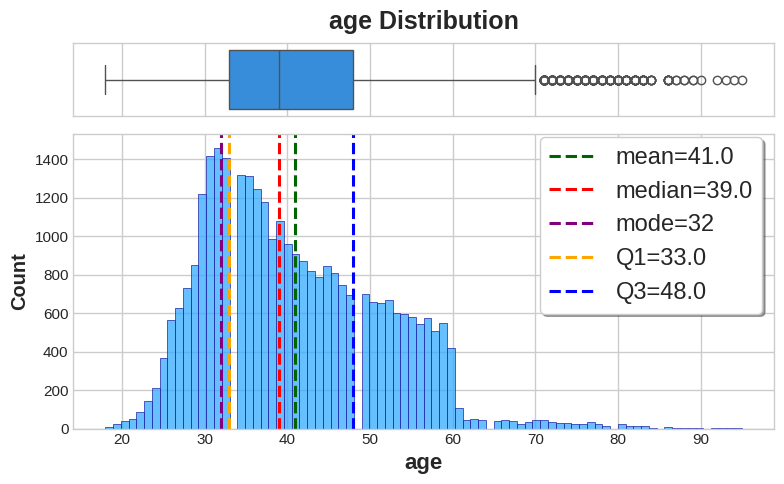

In [ ]:
num_plot(df_eda, 'age')

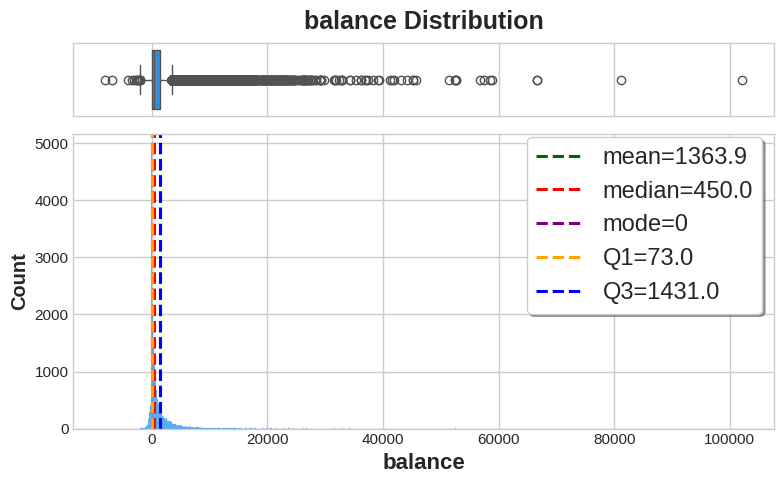

In [ ]:
num_plot(df_eda, 'balance')

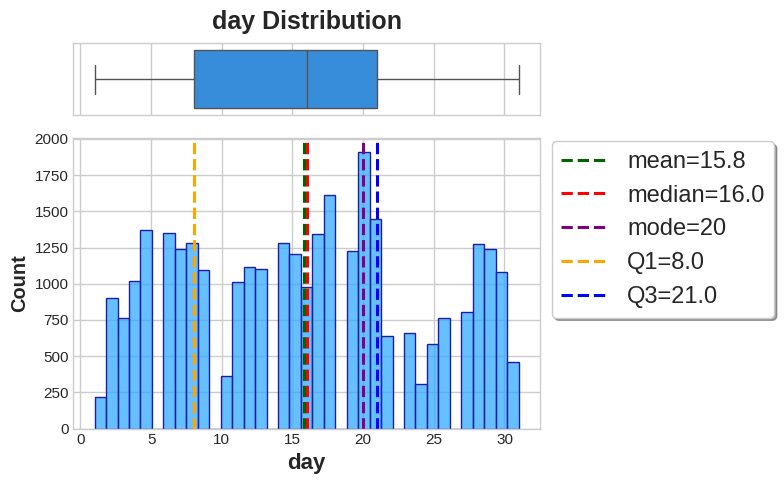

In [ ]:
num_plot(df_eda, 'day')

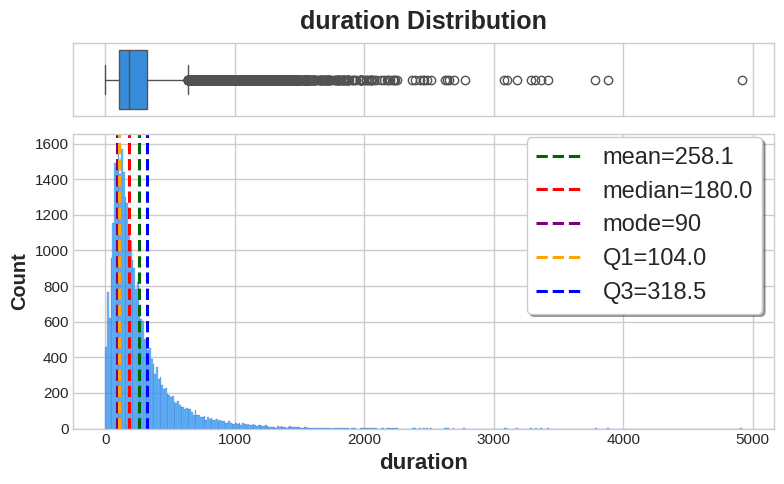

In [ ]:
num_plot(df_eda, 'duration')

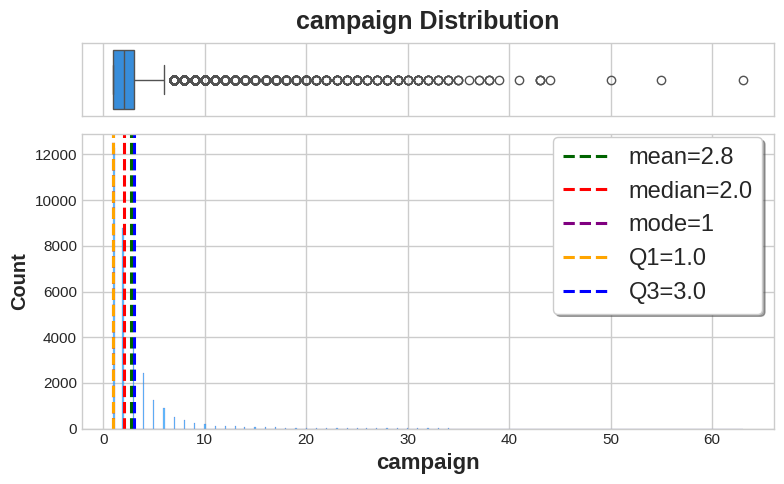

In [ ]:
num_plot(df_eda, 'campaign')

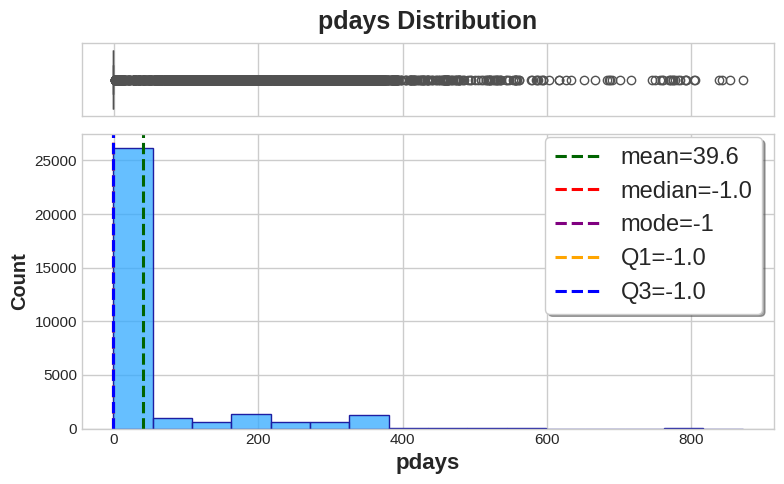

In [ ]:
num_plot(df_eda, 'pdays')

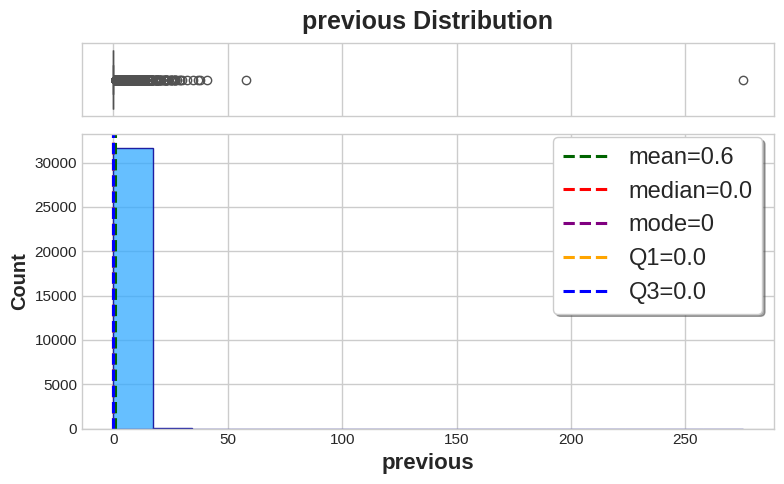

In [ ]:
num_plot(df_eda, 'previous')

**Key Takeaways** :

1. Segmentasi Pelanggan
- Rata-rata usia client adalah 41 tahun dengan saldo rata-rata 1364. Terdapat variasi besar dalam saldo client, yang mengindikasikan adanya perbedaan signifikan dalam kepemilikan keuangan.

2. Saldo Negatif
- Terdapat 8.42% client dengan saldo negatif, menandakan risiko kredit yang perlu dipantau oleh bank untuk memastikan kestabilan keuangan. Diperlukan manajemen risiko yang efektif untuk mengelola potensi risiko kredit ini.

3. Kontak Sebelumnya
- Terdapat 81.92% client tidak memiliki kontak sebelumnya (pdays = -1), menunjukkan potensi untuk meningkatkan interaksi dengan pelanggan.

4. Durasi panggilan
- Rata-rata waktu panggilan adalah 4 menit, dengan kebanyakan panggilan singkat. Sebagian besar klien, sekitar 75%, telah dihubungi sebanyak 2-3 kali selama kampanye.

### Categorical Feature

In [ ]:
df[categorical_feats].describe()

job  marital  education default housing   loan   contact  month poutcome  \
count         31647    31647      31647   31647   31647  31647     31647  31647    31647   
unique           12        3          4       2       2      2         3     12        4   
top     blue-collar  married  secondary      no     yes     no  cellular    may  unknown   
freq           6842    19095      16224   31062   17584  26516     20423   9669    25929   

       subscribed  
count       31647  
unique          2  
top            no  
freq        27932

In [ ]:
result_df = top_freq_percentage(df_eda, categorical_feats)
result_df

top_frequency_percentage top_category
default                       98.151           no
subscribed                    88.261           no
loan                          83.787           no
poutcome                      81.932      unknown
contact                       64.534     cellular
marital                       60.337      married
housing                       55.563          yes
education                     51.266    secondary
month                         30.553          may
job                           21.620  blue-collar

**Key Takeaways** :

1. Mayoritas Pelanggan Tidak Berlangganan
- Mayoritas pelanggan (88.26%) tidak berlangganan. Hal ini menunjukan adanya imbalanced data yang perlu ditangani lebih lanjut.

2. Dominasi Unique Feature
- Selain variabel target, ada beberapa fitur yang memiliki jumlah nilai unik yang sangat mendominasi, yaitu default (98.151%), pinjaman (83.787%), dan poutcome (81.932%). Penting untuk menginvestigasi lebih lanjut apakah keberadaan fitur-fitur ini berdampak pada label target karena kurangnya variasi dalam fitur tersebut.

3. Pembayaran Lain
- Lebih banyak client bank yang melakukan subscribe pada Housing Loan (55.56%), daripada Credit Default (1.84%) atau Personal Loan (16.21%)

## Bivariate Analysis

Analisa hubungan antara dua variabel dalam dataset untuk memahami korelasi atau asosiasi di antara keduanya. Variabel kedua akan berfokus pada target.

### Numerical Feature

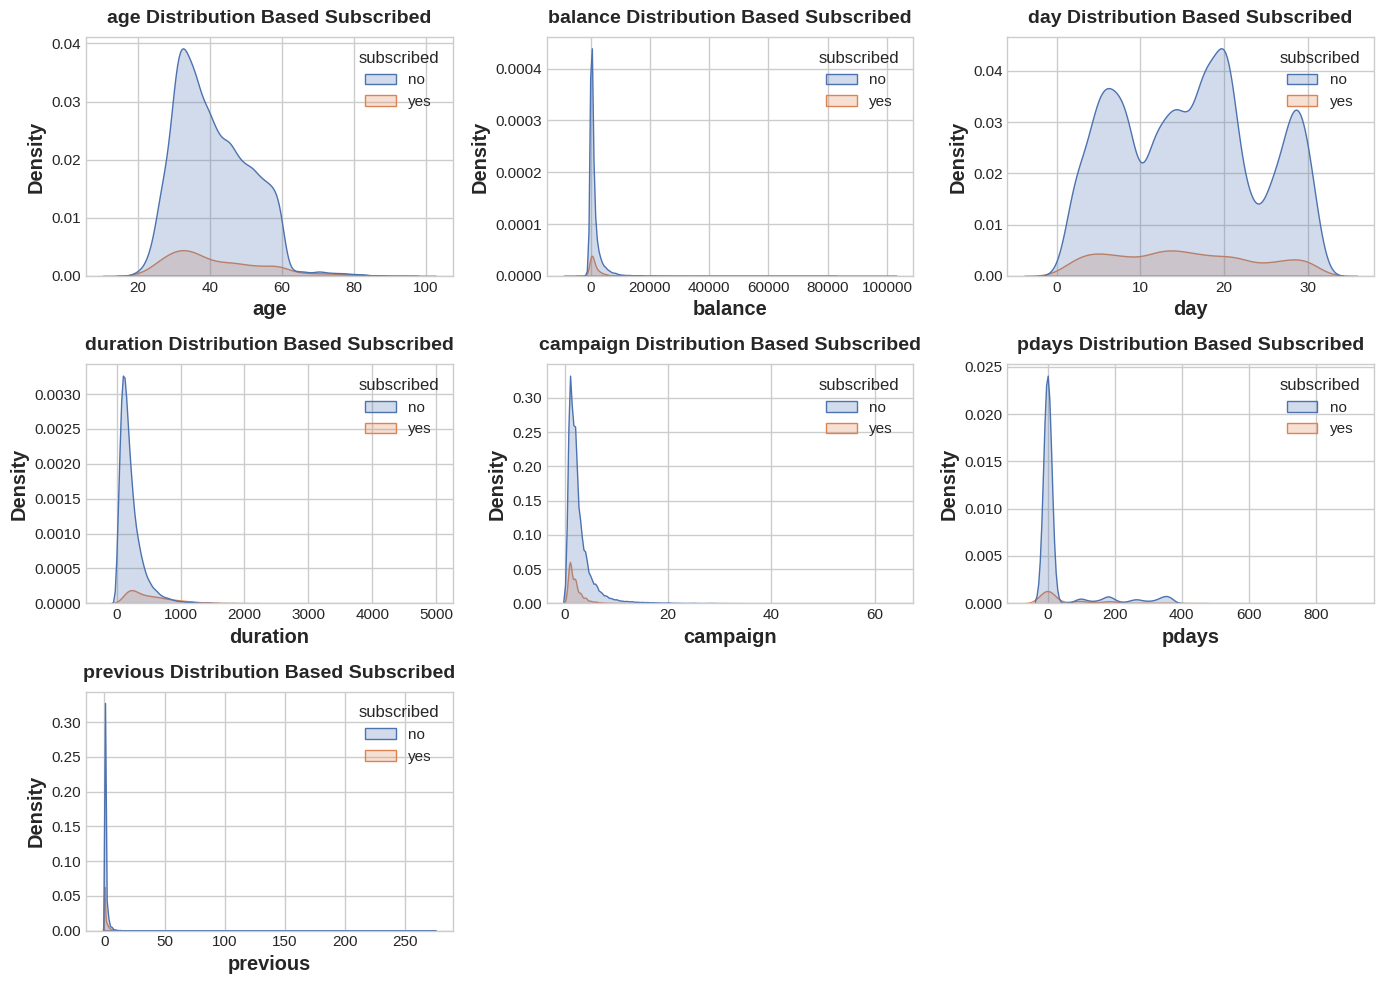

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(0, len(numerical_feats)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df_eda, x=df_eda[numerical_feats[i]], hue=df_eda['subscribed'], fill=True).set(title=f'{numerical_feats[i]} Distribution Based Subscribed')
    plt.tight_layout()

**Key Takeaways** :

- Distribusi fitur numerik tidak dapat secara jelas membedakan apakah pelanggan akan berlangganan atau tidak, seperti yang terlihat dari hasil KDE Plot, distribusi "subscribe yes" dan "subscribe no" saling tumpang tindih.

### Categorical Feature

In [ ]:
def plot_subscription_counts(feature, df, figsize=(7, 5), custom_order=False):
    plt.figure(figsize=figsize)

    # Calculate counts for each unique value of the feature
    feature_counts = df.groupby(feature)['subscribed'].value_counts().unstack(fill_value=0)

    # Sort by total counts
    sorted_index = feature_counts.sum(axis=1).sort_values(ascending=False).index
    feature_counts = feature_counts.loc[sorted_index]

    # Calculate percentages
    total_counts = feature_counts.sum(axis=1)
    yes_percentages = feature_counts['yes'] / total_counts * 100
    no_percentages = feature_counts['no'] / total_counts * 100

    # Define colors with transparency
    yes_color = sns.color_palette()[0] + (0.5,)
    no_color = sns.color_palette()[1] + (0.5,)
    edge_color = 'lightgray'  # Change the color here

    if custom_order:
        custom_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        # Reindex feature_counts based on custom_order
        feature_counts = feature_counts.reindex(custom_order)

    # Plot yes percentages with outline stroke
    plt.bar(feature_counts.index, yes_percentages, color=yes_color, label='Yes', width=0.4, edgecolor=edge_color)

    # Plot no percentages with outline stroke
    plt.bar(feature_counts.index, no_percentages, bottom=yes_percentages, color=no_color, label='No', width=0.4, edgecolor=edge_color)

    plt.title(f"Subscription Counts by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Percentage")
    plt.legend(title='Subscribed', labels=['Yes', 'No'])
    plt.xticks(rotation=45)

    # Display percentages at the center of each bar
    for idx, (value, yes_percentage, no_percentage) in enumerate(zip(feature_counts.index, yes_percentages, no_percentages)):
        plt.text(idx, yes_percentage / 2, f'{yes_percentage:.1f}%', ha='center', va='center')
        plt.text(idx, yes_percentage + no_percentage / 2, f'{no_percentage:.1f}%', ha='center', va='center')

    # Print total counts of each column after reindexing
    for idx, (index, count) in enumerate(zip(sorted_index, total_counts), start=1):
        print(f"{idx}. {index}: {count}")
    print()

    plt.grid(False)  # Remove grid lines
    plt.show()

1. no: 31062
2. yes: 585



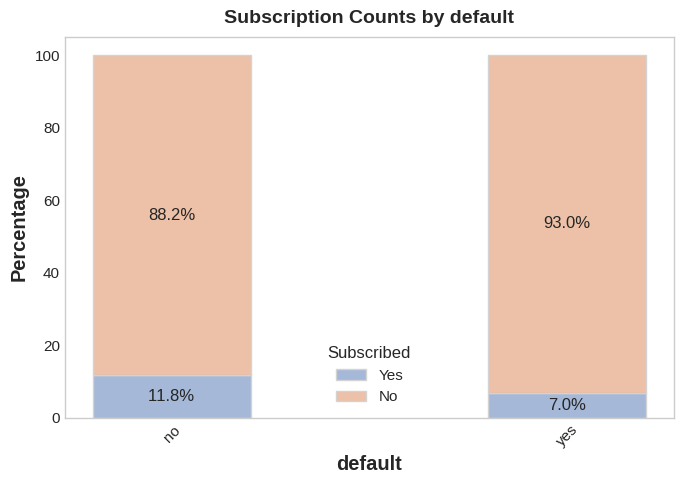

In [ ]:
plot_subscription_counts('default', df_eda)

1. no: 26516
2. yes: 5131



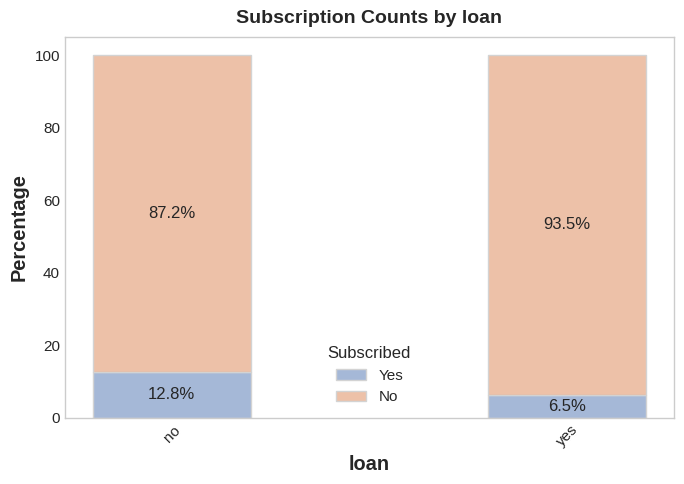

In [ ]:
plot_subscription_counts('loan', df_eda)

1. yes: 17584
2. no: 14063



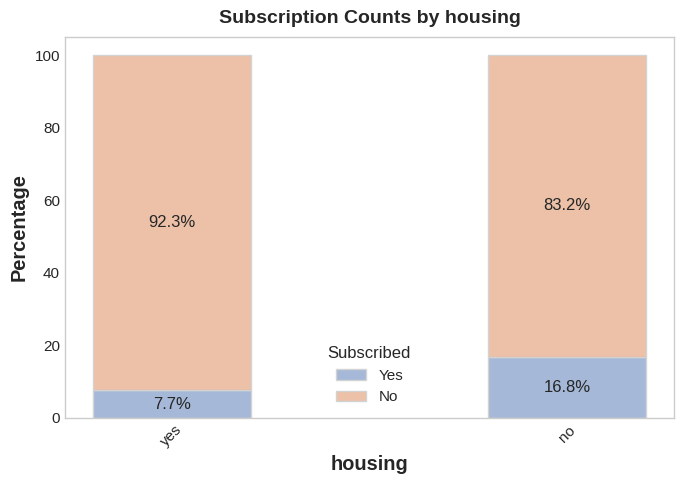

In [ ]:
plot_subscription_counts('housing', df_eda)

**Key Takeaways** :

- Berdasarkan data persentase, terlihat tren menarik dimana lebih banyak klien yang berlangganan term deposit saat mereka tidak memiliki langganan lain seperti kredit, pinjaman rumah, atau pinjaman pribadi di bank. Kemungkinan, klien tanpa langganan lain cenderung lebih tertarik pada investasi jangka panjang seperti term deposit karena tidak ada tanggungan lain yang mengikat mereka.






1. unknown: 25929
2. failure: 3362
3. other: 1288
4. success: 1068



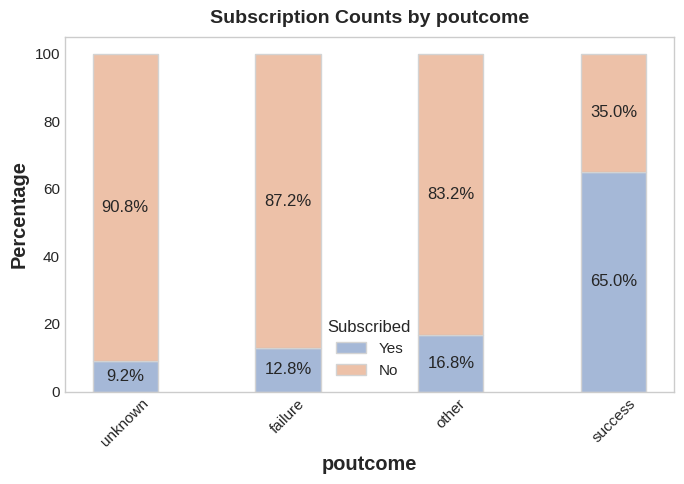

In [ ]:
plot_subscription_counts('poutcome', df_eda)

**Key Takeaways** :

- Berdasarkan data persentase, terdapat perbedaan signifikan dalam respons klien terhadap kampanye sebelumnya. Status kesuksesan memiliki persentase langganan 'yes' yang jauh lebih tinggi dibandingkan dengan status hasil lainnya, dengan nilai mencapai 65%.








1. cellular: 20423
2. unknown: 9177
3. telephone: 2047



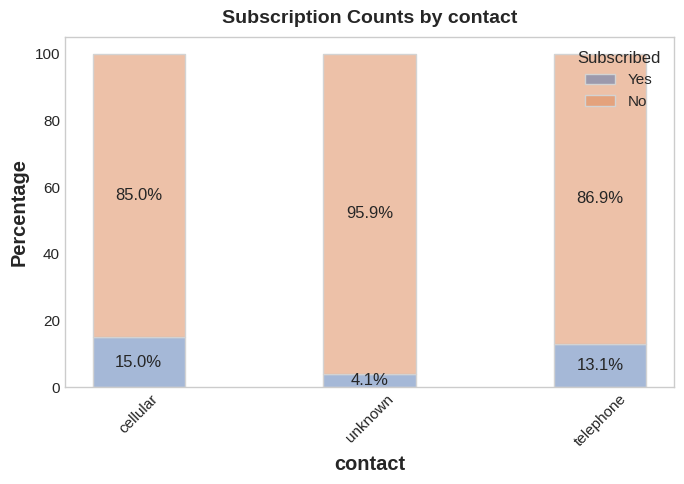

In [ ]:
plot_subscription_counts('contact', df_eda)

**Key Takeaways** :

- Komunikasi melalui perangkat seluler memiliki tingkat langganan tertinggi sebesar 15%, menekankan pentingnya mengutamakan platform seluler dalam strategi pemasaran bank.






1. married: 19095
2. single: 8922
3. divorced: 3630



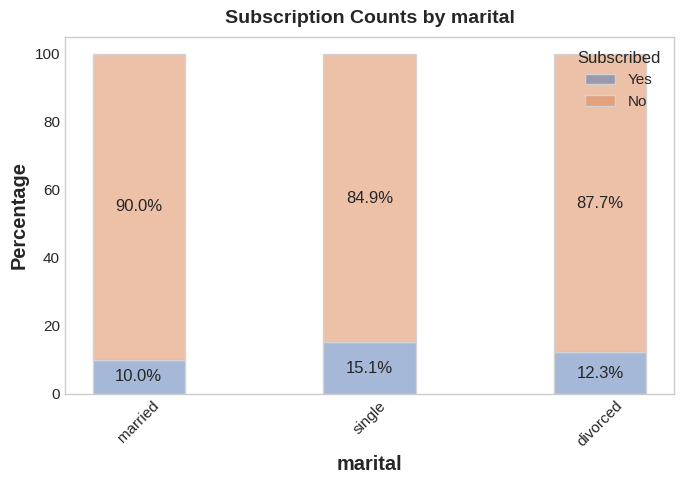

In [ ]:
plot_subscription_counts('marital', df_eda)

**Key Takeaways** :

- Marital status 'single' menunjukkan tingkat langganan tertinggi sebesar 15.1%, kemungkinan karena individu single cenderung memiliki tanggung jawab keuangan yang lebih sedikit dibandingkan dengan mereka yang sudah menikah atau memiliki tanggungan keluarga.



1. secondary: 16224
2. tertiary: 9301
3. primary: 4808
4. unknown: 1314



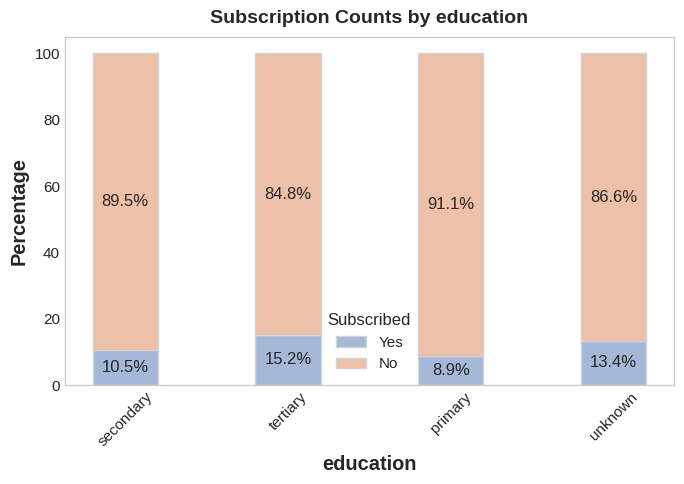

In [ ]:
plot_subscription_counts('education', df_eda)

1. may: 9669
2. jul: 4844
3. aug: 4333
4. jun: 3738
5. nov: 2783
6. apr: 2055
7. feb: 1827
8. jan: 977
9. oct: 512
10. sep: 410
11. mar: 342
12. dec: 157



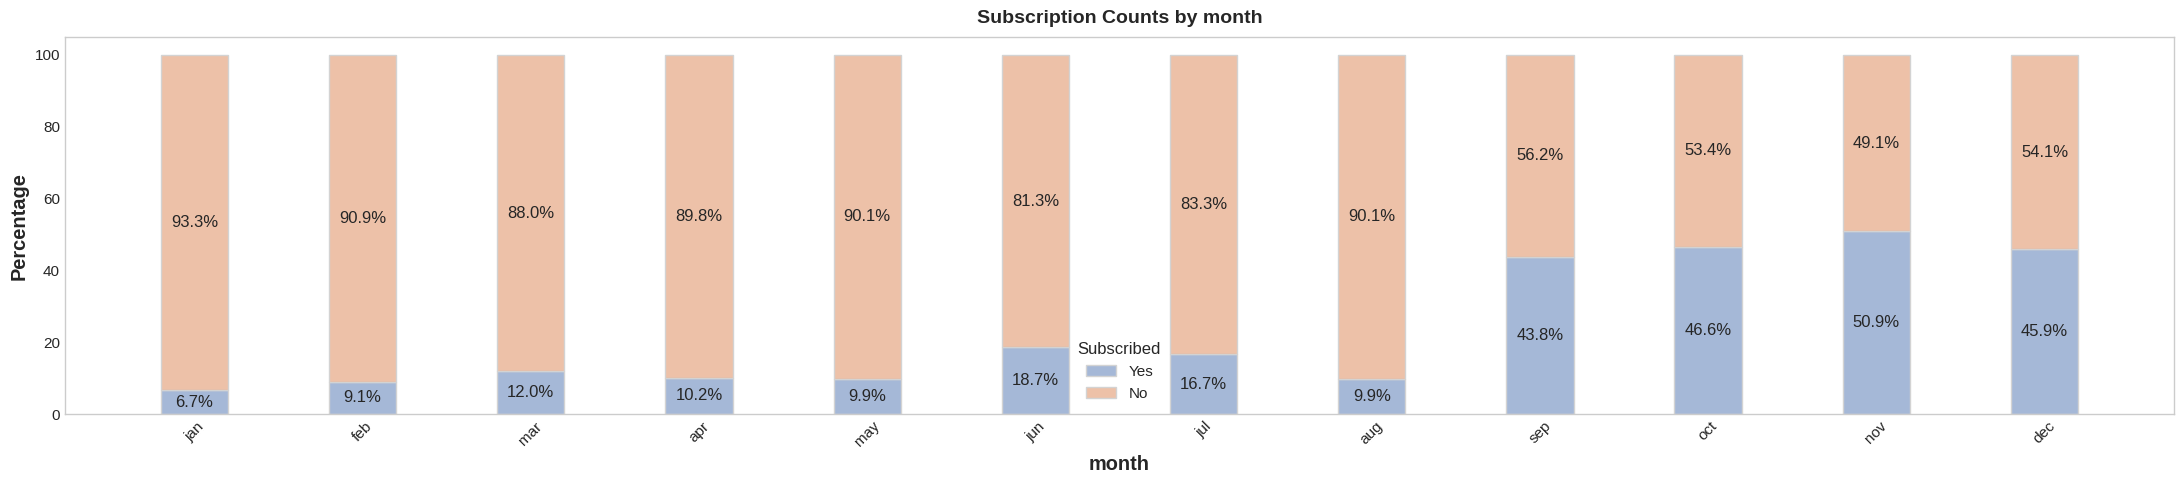

In [ ]:
plot_subscription_counts('month', df_eda, (22,5), True)

**Key Takeaways** :

- Langganan term deposit mencapai persentase tertinggi pada kuartal terakhir tahun, melebihi 40%. Hal ini mungkin terjadi karena akhir tahun sering kali menjadi waktu di mana individu membuat keputusan keuangan besar, seperti perencanaan untuk tahun depan atau alokasi bonus tahunan, yang dapat mendorong minat mereka dalam investasi jangka panjang seperti term deposit.

1. blue-collar: 6842
2. management: 6639
3. technician: 5307
4. admin.: 3631
5. services: 2903
6. retired: 1574
7. self-employed: 1123
8. entrepreneur: 1008
9. unemployed: 905
10. housemaid: 874
11. student: 635
12. unknown: 206



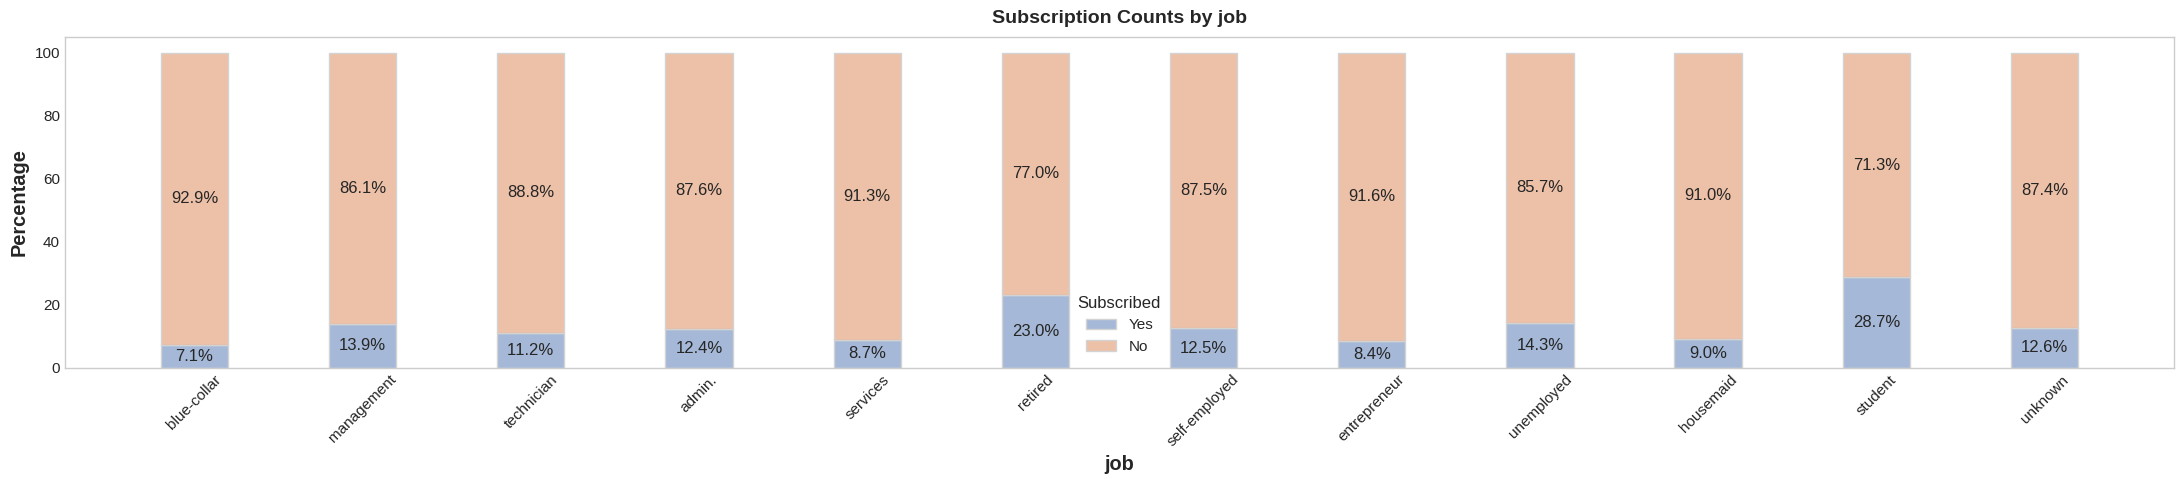

In [ ]:
plot_subscription_counts('job', df_eda, (22,5))

**Key Takeaways** :

- Secara persentase, langganan term deposit mencapai tingkat tertinggi di antara pekerjaan mahasiswa atau pensiunan, melampaui 20%. Hal ini terjadi mungkin karena mereka memiliki waktu dan kecenderungan untuk mengelola keuangan dengan lebih hati-hati atau memiliki kebutuhan investasi jangka panjang.

## Multivariate Analysis

In [ ]:
# Create a dictionary to map 'no' to 0 and 'yes' to 1
subscribed_mapping = {'no': 0, 'yes': 1}

# Apply the mapping to the 'subscribed' column and store it in a new variable
subscribed_encoded = df_eda['subscribed'].map(subscribed_mapping)

# Create a new DataFrame with numerical features and the encoded 'subscribed'
combined_df = pd.concat([df_eda[numerical_feats], subscribed_encoded], axis=1)

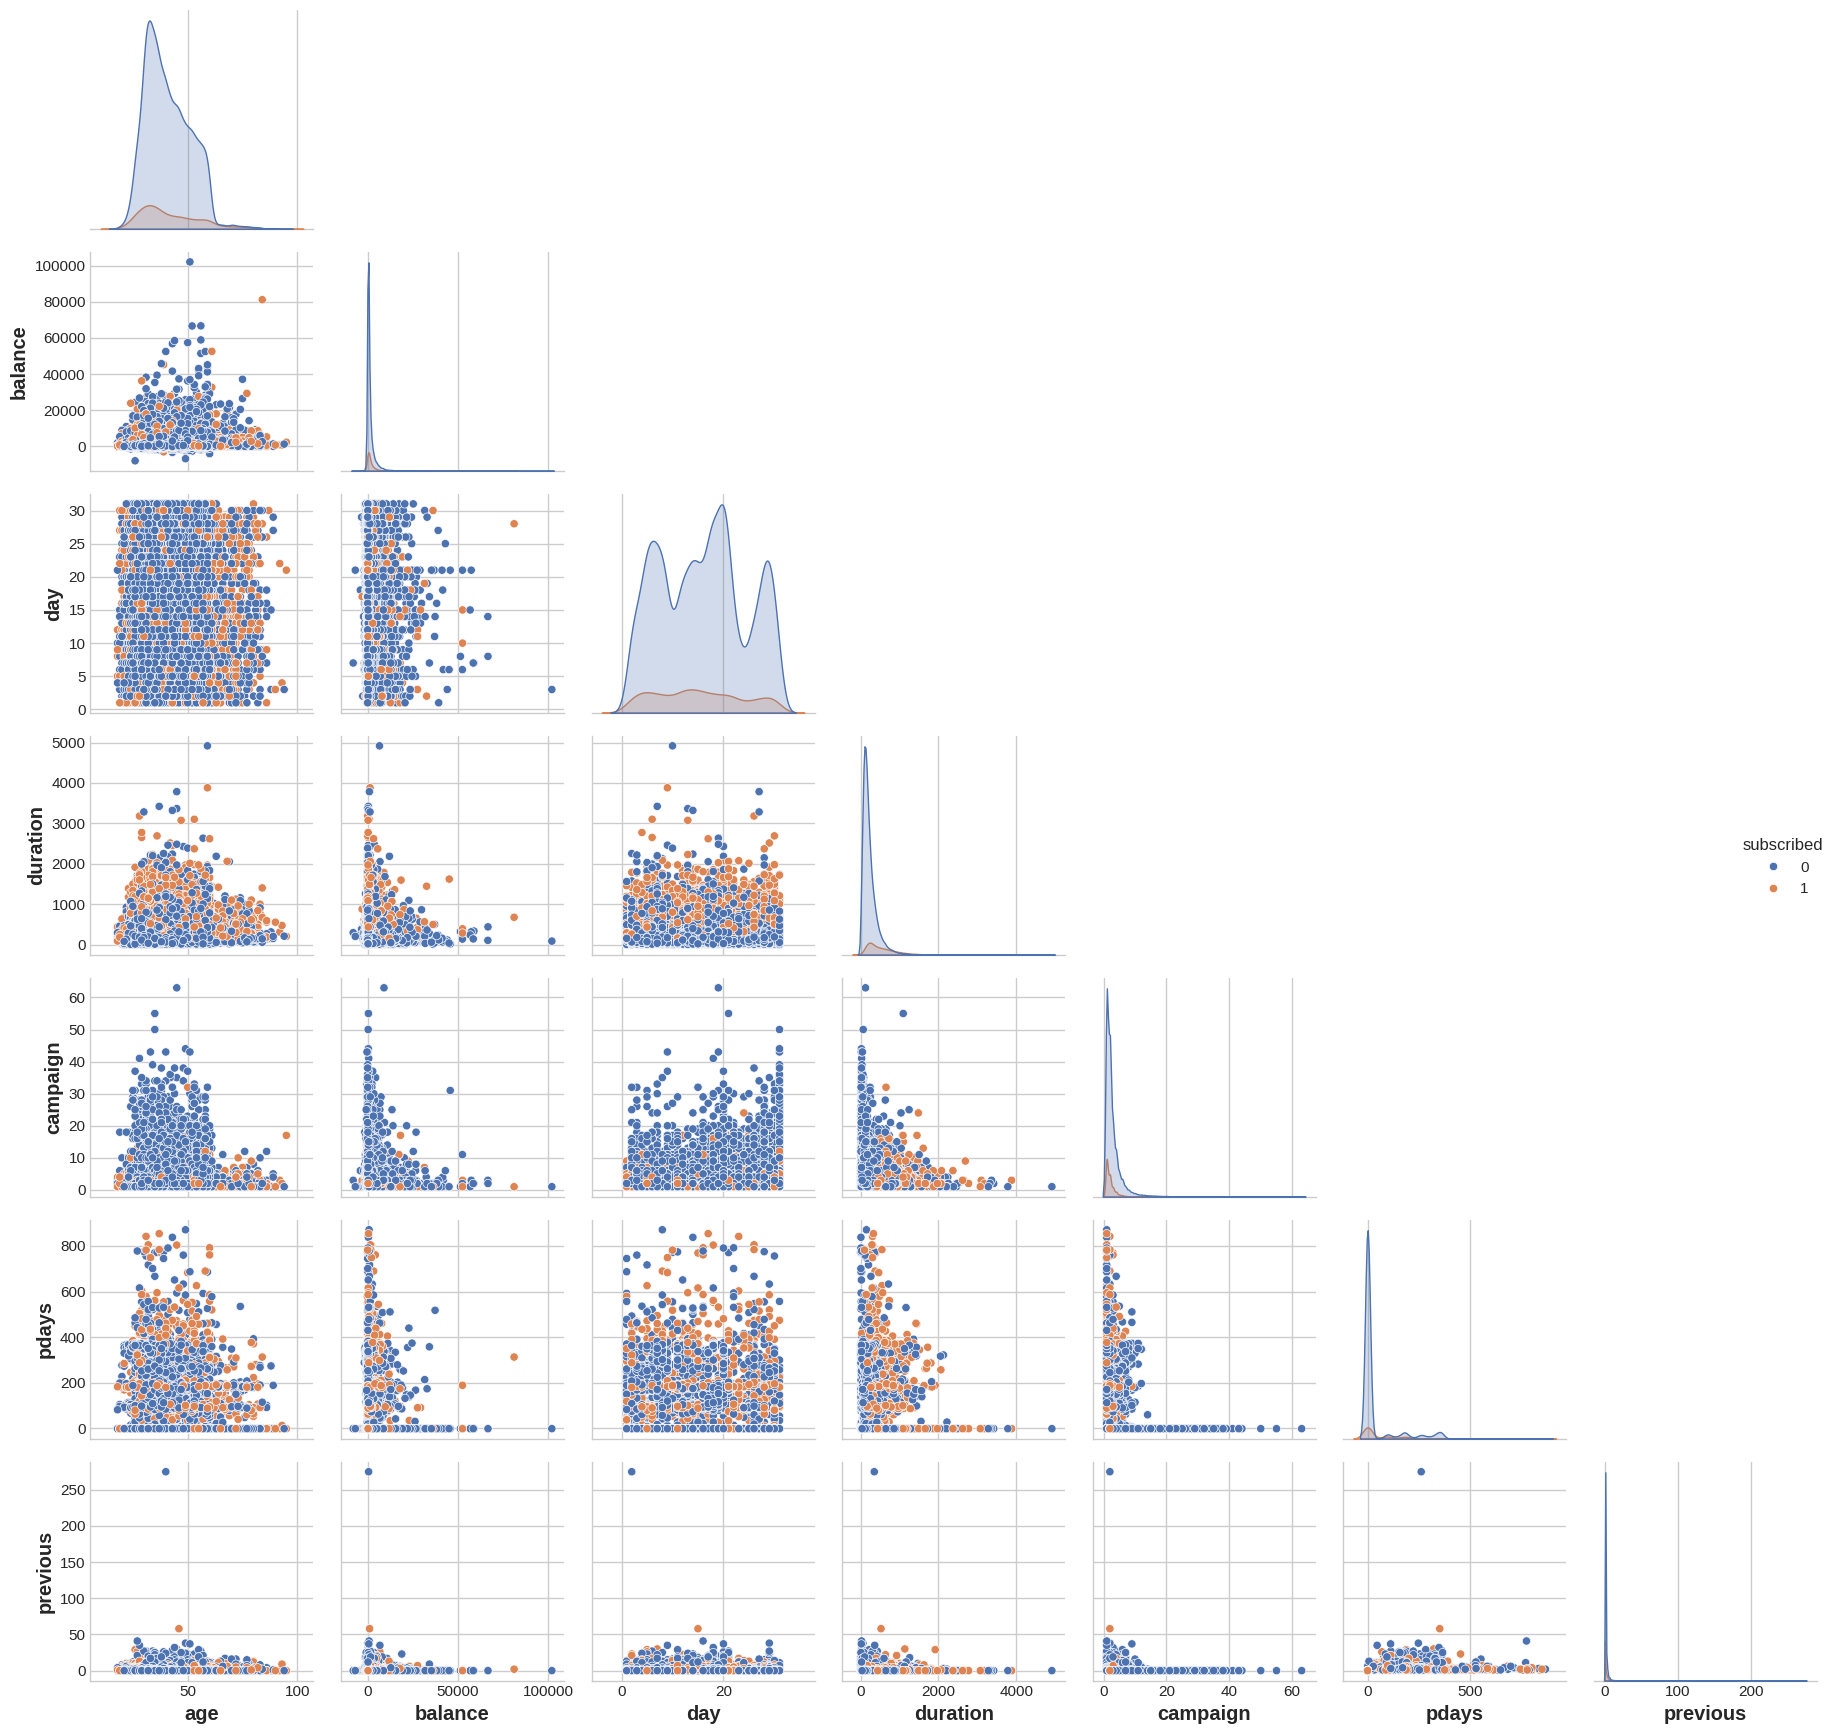

In [ ]:
sns.pairplot(combined_df,hue='subscribed',corner=True)

**Key Takeaways** :

- Tidak terdapat pola khusus yang dapat diambil karena kdeplot antara masing masing feature dengan target sebagai hue saling tumpang tindih dan tidak terpisah.

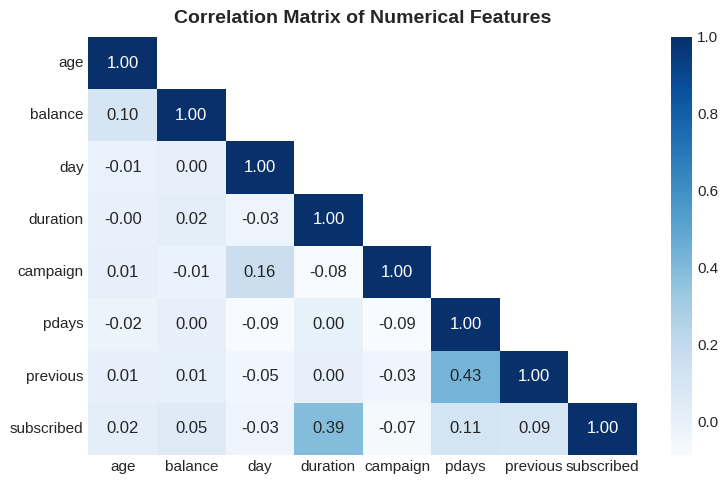

In [ ]:
# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Numerical Features')
plt.grid(False)  # Remove grid lines
plt.show()

**Key Takeaways** :

- Tidak ada feature yang memiliki multicolinearity
- Fitur dengan kolerasi linear yang cukup tinggi dengan target adalah duration dan pdays. Namun karena fitur hanya sedikit, penggunaan semua fitur bisa dipertimbangkan meskipun memiliki korelasi linear yang rendah

# Feature Selection

Feature selection adalah proses pemilihan subset fitur yang paling relevan dari sekumpulan fitur yang tersedia dalam data untuk digunakan dalam model machine learning

### Numerical Feature

Relevansi suatu fitur numerical terhadap target akan dikalkulasi menggunakn point biserial. Point biserial adalah metode statistik yang digunakan untuk mengukur hubungan antara variabel biner dan variabel numerik.

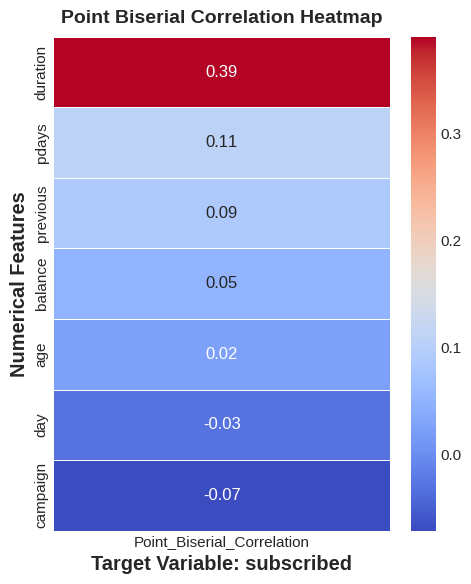

In [ ]:
# Drop the 'subscribed' column from the DataFrame
numerical_features = combined_df.drop(columns=['subscribed'])

# Create an empty DataFrame to store the correlation coefficients
correlation_matrix = pd.DataFrame(index=numerical_features.columns, columns=['Point_Biserial_Correlation'])

# Iterate over each numerical feature
for feature in numerical_features.columns:
    # Compute the point biserial correlation coefficient with respect to the target variable
    pb_corr, _ = pointbiserialr(numerical_features[feature], combined_df['subscribed'])
    # Store the correlation coefficient in the DataFrame
    correlation_matrix.loc[feature, 'Point_Biserial_Correlation'] = pb_corr

# Convert the dtype of the correlation coefficients to float64
correlation_matrix = correlation_matrix.astype('float64')

# Sort the correlation matrix by correlation values
correlation_matrix = correlation_matrix.sort_values(by='Point_Biserial_Correlation', ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Point Biserial Correlation Heatmap')
plt.xlabel('Target Variable: subscribed')
plt.ylabel('Numerical Features')
plt.show()

**Key Takeaways** :

- Feature numerik dengan korelasi yang cukup tinggi adalah duration (39%) dan pdays (11%). Namun penggunaan seluruh fitur dapat dipertambangkan karena fitur yang tidak terlalu banyak.

### Categorical Feature

Relevansi suatu fitur kategorikal terhadap target akan dikalkulasi menggunakn Cramér's V dan P-value

- Cramér's V adalah metrik yang mengukur kekuatan hubungan antara dua variabel kategorikal dengan nilai berkisar antara 0 hingga 1. Nilai yang lebih tinggi menunjukkan hubungan yang lebih kuat antara variabel tersebut.
- P-value adalah ukuran statistik yang menentukan signifikansi dari hasil uji hipotesis. Nilai P yang rendah menunjukkan bahwa ada bukti yang kuat menentang hipotesis nol, sementara nilai P yang tinggi menunjukkan tidak cukup bukti untuk menolak hipotesis nol.

In [ ]:
def categorical_stats(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    if isinstance(confusion_matrix, pd.DataFrame):
        confusion_matrix = confusion_matrix.to_numpy()  # Convert DataFrame to numpy array

    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        # Handle edge case where one of the dimensions is 1
        return np.nan, np.nan

    chi2, p_value, _, _ = ss.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))), p_value

In [ ]:
results = []
for col in categorical_feats:
  if col != 'subscribed':
    confusion_matrix = pd.crosstab(df_eda[col], df_eda['subscribed'])
    cramers_v, p_value = categorical_stats(confusion_matrix)
    results.append({'Column': col, 'Cramers_V': cramers_v, 'P_value': p_value})

# Define thresholds for significance
p_value_threshold = 0.05
cramers_v_threshold = 0.1

# Function to determine significance based on thresholds
def is_significant(p_value, cramers_v):
    return (p_value < p_value_threshold) and (cramers_v > cramers_v_threshold)

results_df = pd.DataFrame(results)
# Add a new column to indicate significance
results_df['Significance & Correlated'] = results_df.apply(lambda row: is_significant(row['P_value'], row['Cramers_V']), axis=1)
results_df = results_df.reindex(results_df['Cramers_V'].sort_values(ascending=False).index)
results_df

Column  Cramers_V  P_value  Significance & Correlated
8   poutcome      0.314    0.000                       True
7      month      0.257    0.000                       True
6    contact      0.152    0.000                       True
4    housing      0.141    0.000                       True
0        job      0.135    0.000                       True
2  education      0.074    0.000                      False
5       loan      0.072    0.000                      False
1    marital      0.069    0.000                      False
3    default      0.019    0.000                      False

Based on Dai et al. (2021):

- Weak: Cramér's V > 0.05
- Moderate: Cramér's V > 0.10
- Strong: Cramér's V > 0.15
- Very Strong: Cramér's V > 0.25

Ref:
Dai, J., Teng, L., Zhao, L., & Zou, H. (2021). The combined analgesic effect of pregabalin and morphine in the treatment of pancreatic cancer pain, a retrospective study. Cancer Medicine, 10(5), 1738–1744. https://doi.org/10.1002/cam4.3779

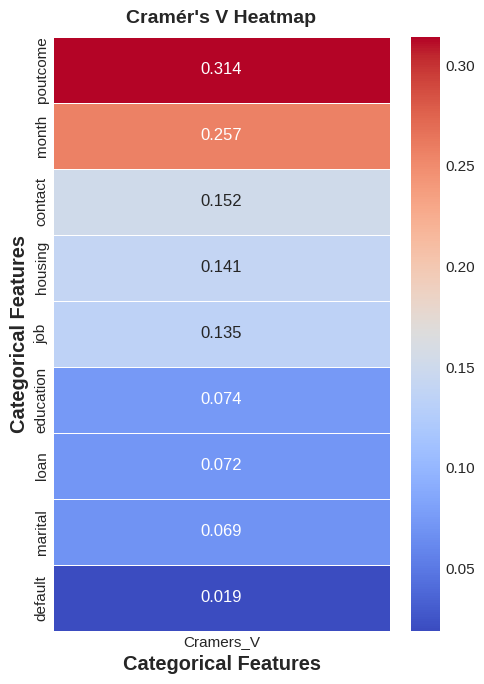

In [ ]:
# Sort the correlation matrix by correlation values
correlation_matrix = results_df[['Column', 'Cramers_V']].sort_values(by='Cramers_V', ascending=False)

# Set the "Column" column as the index and drop it
correlation_matrix.set_index('Column', drop=True, inplace=True)

# Plot the heatmap
plt.figure(figsize=(5, 7))
sns.heatmap(correlation_matrix[['Cramers_V']], cmap='coolwarm', annot=True, fmt=".3f", linewidths=0.5)
plt.title('Cramér\'s V Heatmap')
plt.xlabel('Categorical Features')
plt.ylabel('Categorical Features')

plt.show()

**Key Takeaways** :

- Feature numerik dengan korelasi yang cukup tinggi adalah poutcome (31%), month (25%), contact (15%), housing (14%), dan job (13%). Namun penggunaan seluruh fitur dapat dipertambangkan karena fitur yang tidak terlalu banyak.

# Data Preprocessing

In [ ]:
df_prep = df_eda.copy()

## Label Encoding

---



Proses konversi nilai-nilai dalam suatu fitur kategokal ordinal menjadi nilai numerik yang terurut secara bertingkat.

In [ ]:
# Education
education_mapping = {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

df_prep['education'] = df_prep['education'].map(education_mapping)
df_prep[['education']].sample(3)

education
28156          3
16210          1
17165          1

In [ ]:
# Default, Housing, Loan, Subscribed
binary_mapping = {'no': 0, 'yes': 1}

df_prep['default'] = df_prep['default'].map(binary_mapping)
df_prep['housing'] = df_prep['housing'].map(binary_mapping)
df_prep['loan'] = df_prep['loan'].map(binary_mapping)
df_prep['subscribed'] = df_prep['subscribed'].map(binary_mapping)

df_prep[['default', 'housing', 'loan', 'subscribed']].sample(3)

default  housing  loan  subscribed
13589        0        1     0           0
9436         0        0     0           1
15114        1        0     0           0

In [ ]:
# Month
month_mapping = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}

df_prep['month'] = df_prep['month'].map(month_mapping)
df_prep[['month']].sample(3)

month
26170      7
3319       4
16030      4

In [ ]:
# Poutcome

poutcome_mapping = {"failure": 0, "unknown": 1, "other": 2, "success": 3}
df_prep['poutcome'] = df_prep['poutcome'].map(poutcome_mapping)
df_prep[['poutcome']].sample(3)

poutcome
9985          2
24548         1
14340         1

## One-Hot Encoding

---



Proses konversi nilai-nilai dalam suatu fitur kategorikal nominal menjadi vektor biner yang dapat diinterpretasikan oleh model machine learning

In [ ]:
# Contact, Marital, Job

# List of features to one-hot encode
features_to_encode = ['contact', 'marital', 'job']

# Perform one-hot encoding for each feature
for feature in features_to_encode:
    # Perform one-hot encoding
    df_prep = pd.get_dummies(df_prep, columns=[feature])

In [ ]:
df_prep.head()

age  education  default  balance  housing  loan  day  month  duration  campaign  pdays  \
0   56          3        0     1933        0     0   19     10        44         2     -1   
1   31          1        0        3        0     0   20      6        91         2     -1   
2   27          1        0      891        1     0   18      6       240         1     -1   
3   57          2        0     3287        0     0   22      5       867         1     84   
4   31          1        0      119        1     0    4      1       380         1     -1   

   previous  poutcome  subscribed  contact_cellular  contact_telephone  contact_unknown  \
0         0         1           0                 0                  1                0   
1         0         1           0                 1                  0                0   
2         0         1           0                 1                  0                0   
3         3         3           1                 1                  0                0   
4         0         1           0                 1                  0                0   

   marital_divorced  marital_married  marital_single  job_admin.  job_blue-collar  \
0                 0                1               0           1                0   
1                 0                1               0           0                0   
2                 0                1               0           0                0   
3                 1                0               0           0                0   
4                 0                1               0           0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  \
0                 0              0               0            0                  0             0   
1                 0              0               0            0                  0             0   
2                 0              0               0            0                  0             1   
3                 0              0               1            0                  0             0   
4                 0              0               0            0                  0             0   

   job_student  job_technician  job_unemployed  job_unknown  
0            0               0               0            0  
1            0               0               0            1  
2            0               0               0            0  
3            0               0               0            0  
4            0               1               0            0

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                31647 non-null  int64
 1   education          31647 non-null  int64
 2   default            31647 non-null  int64
 3   balance            31647 non-null  int64
 4   housing            31647 non-null  int64
 5   loan               31647 non-null  int64
 6   day                31647 non-null  int64
 7   month              31647 non-null  int64
 8   duration           31647 non-null  int64
 9   campaign           31647 non-null  int64
 10  pdays              31647 non-null  int64
 11  previous           31647 non-null  int64
 12  poutcome           31647 non-null  int64
 13  subscribed         31647 non-null  int64
 14  contact_cellular   31647 non-null  uint8
 15  contact_telephone  31647 non-null  uint8
 16  contact_unknown    31647 non-null  uint8
 17  marital_divo

In [ ]:
df_prep.to_csv('./preprocessed_data.csv', header=False)

In [ ]:
df_prep = pd.read_csv('/content/Predictive-Modeling-for-Term-Deposit-Subscription-in-Bank-Marketing/dataset/preprocessed_data.csv')

# Modeling

## Preparation

---



In [129]:
X = df_prep.drop(columns=['subscribed'])
y = df_prep[['subscribed']]

In [130]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [132]:
def eval_classification(model, X_train, X_test, y_train, y_test, n_splits=5):
    # Evaluate on the test set
    y_pred_test = model.predict(X_test)

    # StratifiedKFold for cross-validation with stratified sampling
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_test_results = cross_validate(model, X_test, y_test, scoring=['roc_auc'],
                                     cv=cv, return_train_score=False)
    cv_train_results = cross_validate(model, X_train, y_train, scoring=['roc_auc'],
                                      cv=cv, return_train_score=False)


    # Calculate metrics for the test set
    precision_test = round(precision_score(y_test, y_pred_test),2)
    recall_test = round(recall_score(y_test, y_pred_test),2)
    f1_test = round(f1_score(y_test, y_pred_test),2)

    # Display metrics for the training set
    print("Metrics for the Test Set:")
    print("Precision: %.2f" % precision_test)
    print("Recall: %.2f" % recall_test)
    print("F1-Score: %.2f" % f1_test)
    print()

    # Display cross-validation results
    print("Metrics Using Cross Validation:")
    print(f"Mean ROC-AUC (Test): {cv_test_results['test_roc_auc'].mean():.2f}")
    print(f"Std ROC-AUC (Test): {cv_test_results['test_roc_auc'].std():.2f}")
    print()
    print(f"Mean ROC-AUC (Train): {cv_train_results['test_roc_auc'].mean():.2f}")
    print(f"Std ROC-AUC (Train): {cv_train_results['test_roc_auc'].std():.2f}")

    return precision_test, recall_test, f1_test

In [133]:
# Save the trained model to a specific path
MODEL_PATH = '/content/base_model/'

## Logistic Regression

In [134]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

In [135]:
log_pred = log_clf.predict(X_test)
joblib.dump(log_clf, MODEL_PATH + 'log.pkl')

precision_log, recall_log, f1_log = eval_classification(log_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.61
Recall: 0.32
F1-Score: 0.42

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.87
Std ROC-AUC (Test): 0.02

Mean ROC-AUC (Train): 0.89
Std ROC-AUC (Train): 0.01


## KNN

---



In [136]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [137]:
knn_pred = knn_clf.predict(X_test)
joblib.dump(knn_clf, MODEL_PATH + 'knn.pkl')

precision_knn, recall_knn, f1_knn = eval_classification(knn_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.55
Recall: 0.32
F1-Score: 0.40

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.75
Std ROC-AUC (Test): 0.02

Mean ROC-AUC (Train): 0.79
Std ROC-AUC (Train): 0.01


## SVM

---



In [138]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [139]:
svc_pred = svc_clf.predict(X_test)
joblib.dump(svc_clf, MODEL_PATH + 'svc.pkl')

precision_svc, recall_svc, f1_svc = eval_classification(svc_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.66
Recall: 0.30
F1-Score: 0.41

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.84
Std ROC-AUC (Test): 0.02

Mean ROC-AUC (Train): 0.87
Std ROC-AUC (Train): 0.01


## Decision Tree

---



In [140]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [141]:
dt_pred = dt_clf.predict(X_test)
joblib.dump(dt_clf, MODEL_PATH + 'dt.pkl')

precision_dt, recall_dt, f1_dt = eval_classification(dt_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.46
Recall: 0.50
F1-Score: 0.48

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.69
Std ROC-AUC (Test): 0.02

Mean ROC-AUC (Train): 0.70
Std ROC-AUC (Train): 0.00


## Random Forest

---



In [142]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [143]:
rf_pred = rf_clf.predict(X_test)
joblib.dump(rf_clf, MODEL_PATH + 'rf.pkl')

precision_rf, recall_rf, f1_rf = eval_classification(rf_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.65
Recall: 0.39
F1-Score: 0.49

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.90
Std ROC-AUC (Test): 0.01

Mean ROC-AUC (Train): 0.92
Std ROC-AUC (Train): 0.01


## Gaussian Naive Bayes

---



In [144]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [145]:
gnb_pred = gnb_clf.predict(X_test)
joblib.dump(gnb_clf, MODEL_PATH + 'gnb.pkl')

precision_gnb, recall_gnb, f1_gnb = eval_classification(gnb_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.32
Recall: 0.58
F1-Score: 0.41

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.78
Std ROC-AUC (Test): 0.03

Mean ROC-AUC (Train): 0.79
Std ROC-AUC (Train): 0.01


## XGBoost

---



In [146]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [147]:
xgb_pred = xgb_clf.predict(X_test)
joblib.dump(xgb_clf, MODEL_PATH + 'xgb.pkl')

precision_xgb, recall_xgb, f1_xgb = eval_classification(xgb_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.59
Recall: 0.48
F1-Score: 0.53

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.90
Std ROC-AUC (Test): 0.01

Mean ROC-AUC (Train): 0.93
Std ROC-AUC (Train): 0.00


## Gradient Boosting

---



In [148]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [149]:
gb_pred = gb_clf.predict(X_test)
joblib.dump(gb_clf, MODEL_PATH + 'gb.pkl')

precision_gb, recall_gb, f1_gb = eval_classification(gb_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.61
Recall: 0.40
F1-Score: 0.48

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.91
Std ROC-AUC (Test): 0.01

Mean ROC-AUC (Train): 0.93
Std ROC-AUC (Train): 0.01


## LightGBM

---



In [184]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2984, number of negative: 22333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 25317, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117865 -> initscore=-2.012801
[LightGBM] [Info] Start training from score -2.012801


LGBMClassifier()

In [185]:
lgbm_pred = lgbm_clf.predict(X_test)
joblib.dump(lgbm_clf, MODEL_PATH + 'lgbm.pkl')

precision_lgbm, recall_lgbm, f1_lgbm = eval_classification(lgbm_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 585, number of negative: 4479
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 5064, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115521 -> initscore=-2.035543
[LightGBM] [Info] Start training from score -2.035543
[LightGBM] [Info] Number of positive: 585, number of negative: 4479
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 5064, number of used features: 31
[LightGBM] [Info] [binary:Bo

## CatBoost

---



In [153]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.040944
0:	learn: 0.6486812	total: 73.3ms	remaining: 1m 13s
1:	learn: 0.6105965	total: 95.4ms	remaining: 47.6s
2:	learn: 0.5699612	total: 115ms	remaining: 38.4s
3:	learn: 0.5322503	total: 137ms	remaining: 34s
4:	learn: 0.5000309	total: 160ms	remaining: 31.8s
5:	learn: 0.4725618	total: 181ms	remaining: 30s
6:	learn: 0.4479678	total: 213ms	remaining: 30.2s
7:	learn: 0.4295899	total: 234ms	remaining: 29s
8:	learn: 0.4093824	total: 253ms	remaining: 27.9s
9:	learn: 0.3917976	total: 274ms	remaining: 27.1s
10:	learn: 0.3749843	total: 298ms	remaining: 26.8s
11:	learn: 0.3606637	total: 319ms	remaining: 26.3s
12:	learn: 0.3473485	total: 341ms	remaining: 25.9s
13:	learn: 0.3386925	total: 363ms	remaining: 25.5s
14:	learn: 0.3288449	total: 384ms	remaining: 25.2s
15:	learn: 0.3211561	total: 405ms	remaining: 24.9s
16:	learn: 0.3137347	total: 431ms	remaining: 24.9s
17:	learn: 0.3086428	total: 451ms	remaining: 24.6s
18:	learn: 0.3011811	total: 475ms	remaining: 24.5s
19:	learn: 0.2

In [154]:
cb_pred = cb_clf.predict(X_test)
joblib.dump(cb_clf, MODEL_PATH + 'cb.pkl')

precision_cb, recall_cb, f1_cb = eval_classification(cb_clf, X_train, X_test, y_train, y_test)

Streaming output truncated to the last 5000 lines.
15:	learn: 0.3350551	total: 475ms	remaining: 29.2s
16:	learn: 0.3278901	total: 504ms	remaining: 29.1s
17:	learn: 0.3224333	total: 513ms	remaining: 28s
18:	learn: 0.3169150	total: 535ms	remaining: 27.6s
19:	learn: 0.3092392	total: 556ms	remaining: 27.2s
20:	learn: 0.3031482	total: 589ms	remaining: 27.5s
21:	learn: 0.2982059	total: 620ms	remaining: 27.6s
22:	learn: 0.2937930	total: 639ms	remaining: 27.1s
23:	learn: 0.2881724	total: 695ms	remaining: 28.2s
24:	learn: 0.2834674	total: 723ms	remaining: 28.2s
25:	learn: 0.2802448	total: 757ms	remaining: 28.4s
26:	learn: 0.2761532	total: 775ms	remaining: 27.9s
27:	learn: 0.2731202	total: 837ms	remaining: 29.1s
28:	learn: 0.2704161	total: 868ms	remaining: 29.1s
29:	learn: 0.2670431	total: 902ms	remaining: 29.2s
30:	learn: 0.2645966	total: 936ms	remaining: 29.3s
31:	learn: 0.2620786	total: 974ms	remaining: 29.5s
32:	learn: 0.2600258	total: 990ms	remaining: 29s
33:	learn: 0.2582475	total: 1.01s	r

## Adaboost

---



In [155]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [156]:
ab_pred = ab_clf.predict(X_test)
joblib.dump(ab_clf, MODEL_PATH + 'ab.pkl')

precision_ab, recall_ab, f1_ab = eval_classification(ab_clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Precision: 0.58
Recall: 0.36
F1-Score: 0.44

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.89
Std ROC-AUC (Test): 0.01

Mean ROC-AUC (Train): 0.91
Std ROC-AUC (Train): 0.01


# Evaluation

## Model Comparison

---



In [162]:
# Define model names and corresponding metrics
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest',
          'Gaussian NB', 'XGBoost', 'Gradient Boosting', 'LGBM', 'CatBoost', 'AdaBoost']
precisions = [precision_log, precision_knn, precision_svc, precision_dt, precision_rf,
              precision_gnb, precision_xgb, precision_gb, precision_lgbm, precision_cb, precision_ab]
recalls = [recall_log, recall_knn, recall_svc, recall_dt, recall_rf,
           recall_gnb, recall_xgb, recall_gb, recall_lgbm, recall_cb, recall_ab]
f1_scores = [f1_log, f1_knn, f1_svc, f1_dt, f1_rf, f1_gnb, f1_xgb, f1_gb, f1_lgbm, f1_cb, f1_ab]

# Create DataFrame
metrics_df = pd.DataFrame({'Model': models, 'Precision': precisions, 'Recall': recalls, 'F1-Score': f1_scores}).sort_values('F1-Score', ascending=False)

# Display the DataFrame
metrics_df

Model  Precision  Recall  F1-Score
8                  LGBM      0.630   0.510     0.560
9              CatBoost      0.630   0.480     0.540
6               XGBoost      0.590   0.480     0.530
4         Random Forest      0.650   0.390     0.490
3         Decision Tree      0.460   0.500     0.480
7     Gradient Boosting      0.610   0.400     0.480
10             AdaBoost      0.580   0.360     0.440
0   Logistic Regression      0.610   0.320     0.420
2                   SVC      0.660   0.300     0.410
5           Gaussian NB      0.320   0.580     0.410
1                   KNN      0.550   0.320     0.400

LightGBM (LGBM) akan dipilih sebagai model yang digunakan didasarkan pada nilai F1-score tertinggi dibandingkan dengan model-model lainnya dalam daftar. F1-score adalah ukuran gabungan dari precision dan recall, yang berarti nilai F1-score yang tinggi menunjukkan keseimbangan antara kedua metrik tersebut.

## Optimization

---



In [172]:
# Define the LightGBM model
def create_lgbm_model(n_estimators, learning_rate, max_depth, min_child_weight, subsample, colsample_bytree):
    model = LGBMClassifier(n_estimators=int(n_estimators),
                           learning_rate=learning_rate,
                           max_depth=int(max_depth),
                           min_child_weight=min_child_weight,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           random_state=42)
    return model

In [173]:
# Define the objective function to optimize
def objective(n_estimators, learning_rate, max_depth, min_child_weight, subsample, colsample_bytree):
    model = create_lgbm_model(n_estimators, learning_rate, max_depth, min_child_weight, subsample, colsample_bytree)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='binary')
    return f1

In [174]:
# Define the search space for hyperparameters
pbounds = {'n_estimators': (50, 500),
          'learning_rate': (0.01, 0.3),
          'max_depth': (3, 15),
          'min_child_weight': (1, 10),
          'subsample': (0.5, 1),
          'colsample_bytree': (0.5, 1)}

In [175]:
# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2)
optimizer.maximize(init_points=5, n_iter=100)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [177]:
# Print the optimized hyperparameters and F1 Score
print('Optimized hyperparameters:')
print(optimizer.max['params'])
print('F1 Score: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'colsample_bytree': 0.9189486441541788, 'learning_rate': 0.05313304063365639, 'max_depth': 14.708706776984497, 'min_child_weight': 6.64071495254778, 'n_estimators': 350.33109950160144, 'subsample': 0.7208687584446896}
F1 Score: 56.76%


## Model Result

---



In [194]:
MODEL_PATH = '/content/best_model/'

In [200]:
# Define the optimized hyperparameters
optimized_params = {
    'colsample_bytree': 0.9189486441541788,
    'learning_rate': 0.05313304063365639,
    'max_depth': int(14.708706776984497),
    'min_child_weight': 6.64071495254778,
    'n_estimators': int(350.33109950160144),
    'subsample': 0.7208687584446896,
    'num_leaves': 31
}

In [201]:
best_lgbm_clf = LGBMClassifier(**optimized_params)
best_lgbm_clf.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2984, number of negative: 22333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 25317, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117865 -> initscore=-2.012801
[LightGBM] [Info] Start training from score -2.012801


LGBMClassifier(colsample_bytree=0.9189486441541788,
               learning_rate=0.05313304063365639, max_depth=14,
               min_child_weight=6.64071495254778, n_estimators=350,
               subsample=0.7208687584446896)

In [ ]:
lgbm_pred = best_lgbm_clf.predict(X_test)
joblib.dump(best_lgbm_clf, MODEL_PATH + 'lgbm.pkl')
y_pred = best_lgbm_clf.predict(X_test)

In [203]:
# Calculate precision, recall, and F1-score
precision_best_lgbm = precision_score(y_test, y_pred)
recall_best_lgbm = recall_score(y_test, y_pred)
f1_best_lgbm = f1_score(y_test, y_pred)

print("Precision (LightGBM): {:.2f}".format(precision_lgbm))
print("Recall (LightGBM): {:.2f}".format(recall_lgbm))
print("F1 Score (LightGBM): {:.2f}".format(f1_lgbm))

Precision (LightGBM): 0.63
Recall (LightGBM): 0.51
F1 Score (LightGBM): 0.56


**Key Takeaways** :

- Optimisasi parameter pada model LightGBM tidak menghasilkan peningkatan,dengan nilai Precision, Recall, dan F1 Score tidak mengalami perubahan yang signifikan. Namun penggunaan model setelah optimization akan tetap dilakukan

## Feature Importance

---



Feature importance akan menggunakan SHAP untuk memberikan wawasan tentang pengaruh setiap fitur terhadap prediksi model, dengan nilai antara -1 hingga 1. Nilai positif menunjukkan kontribusi positif terhadap prediksi, sedangkan nilai negatif menunjukkan kontribusi negatif. Semakin besar nilai absolut, semakin besar pengaruhnya terhadap prediksi.

In [217]:
# Remove the "subscribed" column from the DataFrame
df_feat = df_prep.drop(columns=["subscribed"])

In [213]:
# Calculate SHAP values
explainer = shap.TreeExplainer(best_lgbm_clf)
shap_values = explainer.shap_values(X_test)

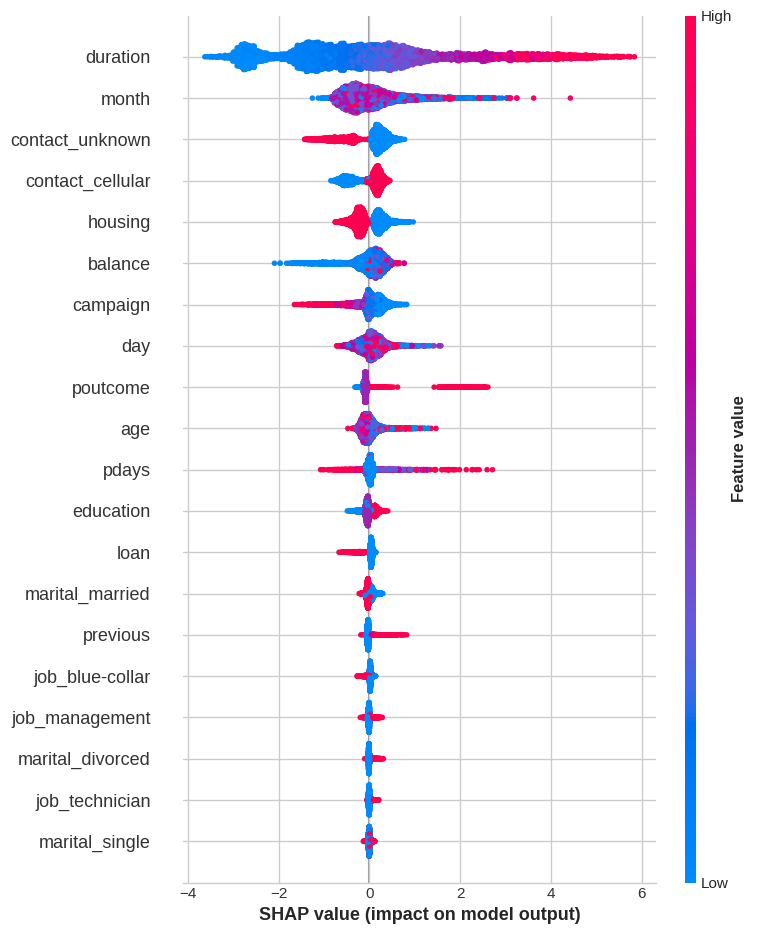

In [218]:
# Summarize the effects of features
shap.summary_plot(shap_values, X_test, feature_names=list(df_feat.columns))

**Key Takeaways** :

Dari hasil feature importance, top 5 fitur yang paling memengaruhi prediksi model adalah
- duration (Positive)
- month (Negative)
- contact_unknown (Negative)
- contact_celular (Positive)
- housing (Negative)

## Error Analysis

---



In [252]:
subscribed = df_prep.pop('subscribed')
df_prep['subscribed'] = subscribed

X_columns = df_prep.drop('subscribed', axis=1).columns

In [274]:
# Convert X_train and X_test to DataFrames
df_X_train = pd.DataFrame(X_train, columns=X_columns)
df_X_test = pd.DataFrame(X_test, columns=X_columns)

# Create DataFrames for y_train, y_test, and y_pred
df_y_train = pd.DataFrame(y_train, columns=['subscribed'])
df_y_test = pd.DataFrame(y_test, columns=['subscribed'])

# Reset indices
df_X_train.reset_index(drop=True, inplace=True)
df_X_test.reset_index(drop=True, inplace=True)
df_y_train.reset_index(drop=True, inplace=True)
df_y_test.reset_index(drop=True, inplace=True)

# Combine all DataFrames into one DataFrame for training and testing
df_mod_train = pd.concat([df_X_train, df_y_train], axis=1)
df_mod_test = pd.concat([df_X_test, df_y_test], axis=1)

# Combine training and testing DataFrames into one
df_mod = pd.concat([df_mod_train, df_mod_test], axis=0)

df_mod.head()

age  education  default  balance  housing   loan    day  month  duration  campaign  pdays  \
0  0.285      1.034   -0.138    1.273    0.895 -0.439  1.702 -0.480     0.066    -0.567 -0.408   
1  1.228      1.034   -0.138   -0.382   -1.117 -0.439 -1.182 -1.730    -0.965     1.038 -0.408   
2 -1.129     -0.298   -0.138   -0.340   -1.117 -0.439  1.702 -0.897     0.821    -0.567 -0.408   
3 -0.846      1.034   -0.138    0.797    0.895 -0.439  0.620  2.019    -0.807     0.075 -0.408   
4 -0.281      1.034   -0.138   -0.442   -1.117 -0.439  1.221  0.769    -0.617     0.396 -0.408   

   previous  poutcome  contact_cellular  contact_telephone  contact_unknown  marital_divorced  \
0    -0.302    -0.005            -1.345             -0.262            1.559            -0.361   
1    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   
2    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   
3    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   
4    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   

   marital_married  marital_single  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0            0.807          -0.622      -0.361           -0.528            -0.182         -0.169   
1            0.807          -0.622      -0.361           -0.528            -0.182         -0.169   
2           -1.240           1.608      -0.361           -0.528            -0.182         -0.169   
3           -1.240           1.608       2.772           -0.528            -0.182         -0.169   
4            0.807          -0.622      -0.361           -0.528            -0.182         -0.169   

   job_management  job_retired  job_self-employed  job_services  job_student  job_technician  \
0           1.946       -0.228             -0.192        -0.318       -0.141          -0.449   
1           1.946       -0.228             -0.192        -0.318       -0.141          -0.449   
2          -0.514       -0.228             -0.192        -0.318        7.081          -0.449   
3          -0.514       -0.228             -0.192        -0.318       -0.141          -0.449   
4           1.946       -0.228             -0.192        -0.318       -0.141          -0.449   

   job_unemployed  job_unknown  subscribed  
0          -0.170       -0.079           0  
1          -0.170       -0.079           0  
2          -0.170       -0.079           1  
3          -0.170       -0.079           0  
4          -0.170       -0.079           0

In [294]:
# Make predictions on all data in df_mod without 'subscribed' column
y_pred_all = best_lgbm_clf.predict(df_mod.drop('subscribed', axis=1))

# Add the predicted values as a new column to df_mod
df_mod['predicted_label'] = y_pred_all
df_mod.head()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


age  education  default  balance  housing   loan    day  month  duration  campaign  pdays  \
0  0.285      1.034   -0.138    1.273    0.895 -0.439  1.702 -0.480     0.066    -0.567 -0.408   
1  1.228      1.034   -0.138   -0.382   -1.117 -0.439 -1.182 -1.730    -0.965     1.038 -0.408   
2 -1.129     -0.298   -0.138   -0.340   -1.117 -0.439  1.702 -0.897     0.821    -0.567 -0.408   
3 -0.846      1.034   -0.138    0.797    0.895 -0.439  0.620  2.019    -0.807     0.075 -0.408   
4 -0.281      1.034   -0.138   -0.442   -1.117 -0.439  1.221  0.769    -0.617     0.396 -0.408   

   previous  poutcome  contact_cellular  contact_telephone  contact_unknown  marital_divorced  \
0    -0.302    -0.005            -1.345             -0.262            1.559            -0.361   
1    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   
2    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   
3    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   
4    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   

   marital_married  marital_single  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0            0.807          -0.622      -0.361           -0.528            -0.182         -0.169   
1            0.807          -0.622      -0.361           -0.528            -0.182         -0.169   
2           -1.240           1.608      -0.361           -0.528            -0.182         -0.169   
3           -1.240           1.608       2.772           -0.528            -0.182         -0.169   
4            0.807          -0.622      -0.361           -0.528            -0.182         -0.169   

   job_management  job_retired  job_self-employed  job_services  job_student  job_technician  \
0           1.946       -0.228             -0.192        -0.318       -0.141          -0.449   
1           1.946       -0.228             -0.192        -0.318       -0.141          -0.449   
2          -0.514       -0.228             -0.192        -0.318        7.081          -0.449   
3          -0.514       -0.228             -0.192        -0.318       -0.141          -0.449   
4           1.946       -0.228             -0.192        -0.318       -0.141          -0.449   

   job_unemployed  job_unknown  subscribed  predicted_label  
0          -0.170       -0.079           0                0  
1          -0.170       -0.079           0                0  
2          -0.170       -0.079           1                1  
3          -0.170       -0.079           0                0  
4          -0.170       -0.079           0                0

In [297]:
df_err = df_mod[df_mod['subscribed'] != df_mod['predicted_label']]
df_err.head()

age  education  default  balance  housing   loan    day  month  duration  campaign  pdays  \
45   1.888     -0.298   -0.138    0.211   -1.117 -0.439  0.740 -0.064     0.137    -0.567  5.408   
80  -0.941      1.034   -0.138   -0.396    0.895 -0.439 -1.423 -1.730     1.244    -0.246  1.993   
117  0.474     -1.629   -0.138   -0.090    0.895  2.275 -0.101 -0.480     1.050    -0.246  3.148   
118 -1.412      1.034   -0.138   -0.229   -1.117  2.275  0.140 -1.313    -0.388    -0.246 -0.408   
125  0.851      1.034   -0.138    2.222    0.895 -0.439  1.101  1.602     0.141     0.075  4.705   

     previous  poutcome  contact_cellular  contact_telephone  contact_unknown  marital_divorced  \
45      0.771    -1.890             0.743             -0.262           -0.641            -0.361   
80      3.452     1.880             0.743             -0.262           -0.641            -0.361   
117    30.802     1.880             0.743             -0.262           -0.641            -0.361   
118    -0.302    -0.005             0.743             -0.262           -0.641            -0.361   
125     0.234     1.880            -1.345              3.813           -0.641            -0.361   

     marital_married  marital_single  job_admin.  job_blue-collar  job_entrepreneur  \
45             0.807          -0.622      -0.361           -0.528            -0.182   
80             0.807          -0.622      -0.361           -0.528            -0.182   
117            0.807          -0.622      -0.361            1.896            -0.182   
118           -1.240           1.608      -0.361           -0.528            -0.182   
125            0.807          -0.622      -0.361           -0.528            -0.182   

     job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  \
45          -0.169          -0.514        4.395             -0.192        -0.318       -0.141   
80          -0.169           1.946       -0.228             -0.192        -0.318       -0.141   
117         -0.169          -0.514       -0.228             -0.192        -0.318       -0.141   
118         -0.169          -0.514       -0.228              5.203        -0.318       -0.141   
125         -0.169           1.946       -0.228             -0.192        -0.318       -0.141   

     job_technician  job_unemployed  job_unknown  subscribed  predicted_label  
45           -0.449          -0.170       -0.079           0                1  
80           -0.449          -0.170       -0.079           1                0  
117          -0.449          -0.170       -0.079           1                0  
118          -0.449          -0.170       -0.079           0                1  
125          -0.449          -0.170       -0.079           0                1

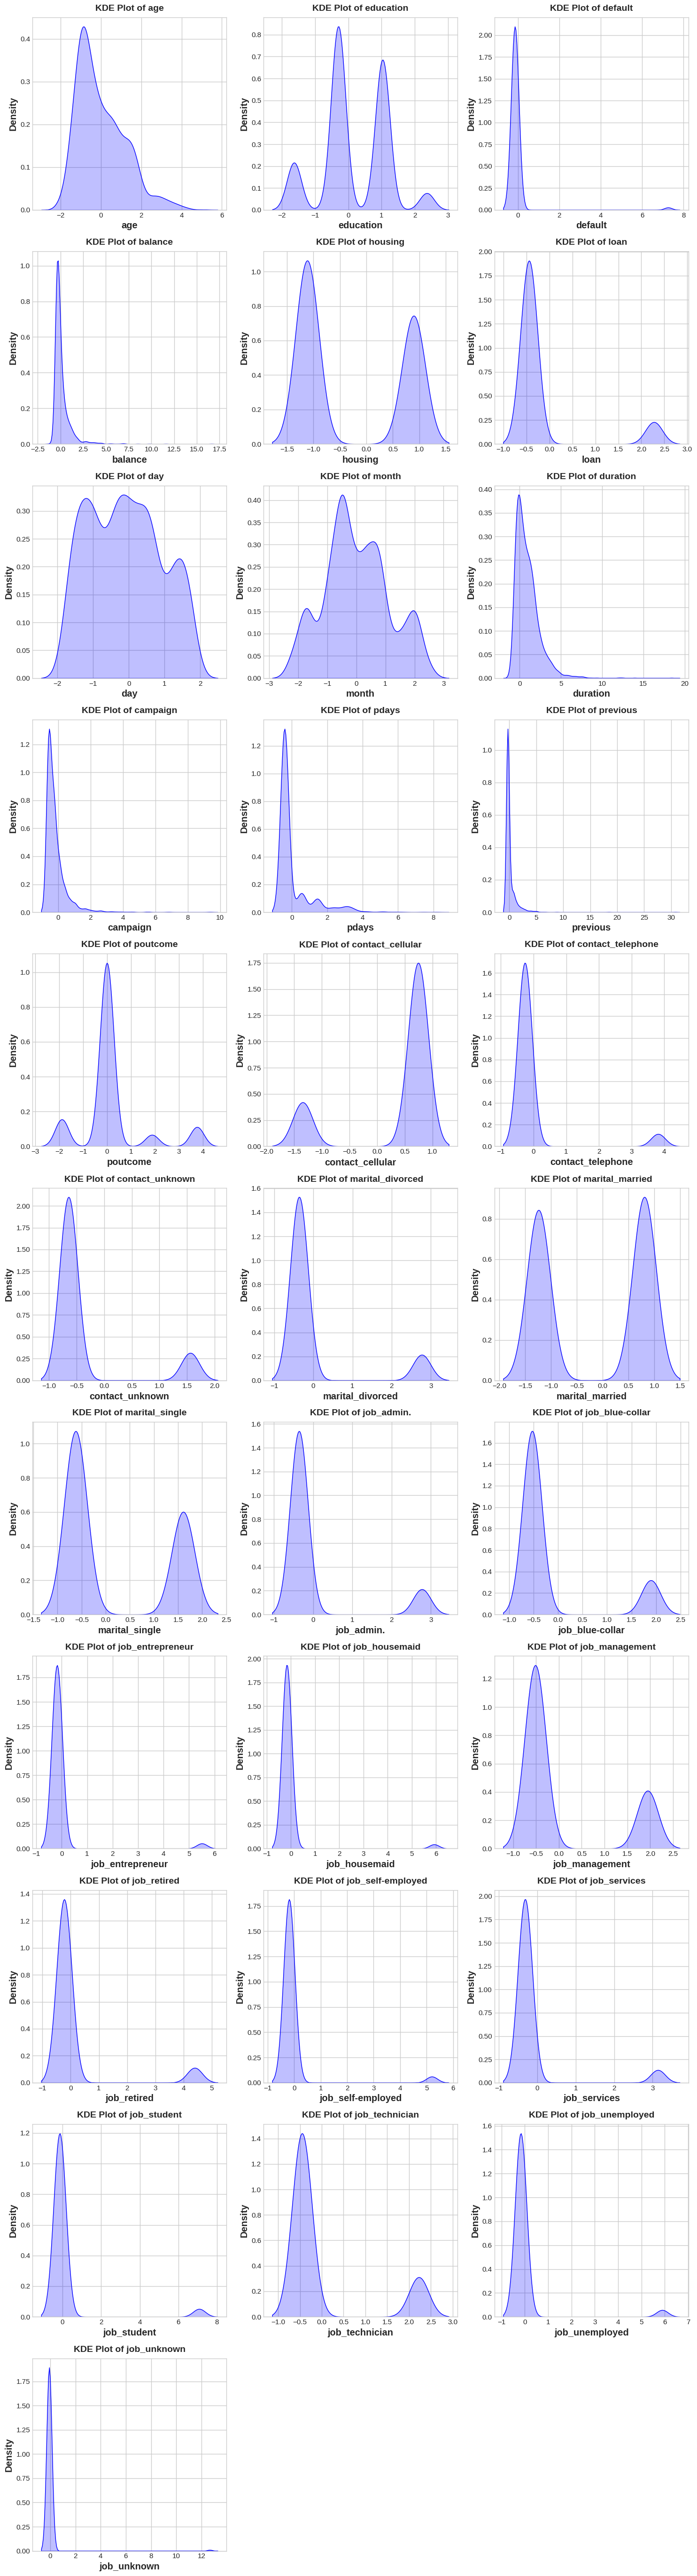

In [304]:
# Calculate the number of rows and columns needed
num_features = len(df_err.columns[:-2])  # Exclude target and predicted label
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot KDE plots for each feature
for i, feature in enumerate(df_err.columns[:-2]):  # Exclude target and predicted label
    ax = axes[i]
    sns.kdeplot(data=df_err[feature], color='blue', label='Misclassified', shade=True, ax=ax)
    ax.set_title(f'KDE Plot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Hide empty subplots
for j in range(num_features, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Key Takeaways** :

Pada Error Analysis, model gagal mengklasifikasikan data tertentu, yaitu:
- Pengguna yang tidak memiliki kredit bermasalah (default credit).
- Pengguna yang tidak berlangganan pinjaman pribadi (personal loan).
- Pengguna yang dihubungi melalui ponsel seluler (contact celular).

# Recommendation

## Technical

---



- Mencari dataset tambahan yang lebih bervariasi untuk menambah variasi dan representasi yang lebih baik dari populasi pengguna.
- Lakukan peninjauan mendalam terhadap fitur-fitur yang digunakan dalam model untuk memastikan relevansi dan keterkaitannya dengan target yang diinginkan.
- Eksplorasi lebih lanjut terhadap teknik pemrosesan data yang dapat meningkatkan kinerja model.

## Business

---



- Manfaatkan informasi dari model untuk menyusun kampanye pemasaran yang lebih terarah, dengan menargetkan pelanggan yang memiliki kemungkinan tinggi untuk berlangganan.
- Tingkatkan strategi retensi pelanggan dengan memanfaatkan wawasan dari model untuk memahami faktor-faktor yang memengaruhi keputusan pelanggan dalam berlangganan.